In [103]:
# Imports
import numpy as np

In [104]:
# Première étape: créer un ensemble de validation pour le dataset des pourriels

# Load data from file (converted from nominal to numerical (binary approach))
num_features_spam = 57
num_features_galaxy = 75

data_spam = np.loadtxt("spam.csv", delimiter=",", skiprows=0)
data_galaxy = np.loadtxt("galaxy_feature_vectors.csv", delimiter=",", skiprows=0)

In [105]:
data_spam

array([[  0.  ,   0.  ,   0.  , ...,  12.  , 372.  ,   0.  ],
       [  0.  ,   0.  ,   2.94, ...,   4.  ,  19.  ,   0.  ],
       [  0.  ,   0.  ,   1.49, ...,   5.  , 111.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  11.  ,  26.  ,   1.  ],
       [  0.  ,   0.  ,   0.  , ...,   8.  ,  20.  ,   0.  ],
       [  0.  ,   0.55,   0.  , ...,   4.  ,  39.  ,   0.  ]])

In [106]:
data_galaxy

array([[ 3.63e+05,  4.39e+01,  5.10e+01, ..., -2.65e-16,  5.58e-24,
         1.00e+00],
       [ 8.31e+05,  3.85e+01,  5.01e+01, ...,  1.37e-17,  4.81e-27,
         0.00e+00],
       [ 7.27e+05,  2.82e+01,  4.36e+01, ...,  4.76e-18,  2.01e-26,
         0.00e+00],
       ...,
       [ 7.92e+05,  1.97e+01,  3.51e+01, ...,  3.49e-16, -7.65e-24,
         0.00e+00],
       [ 4.65e+05,  3.76e+01,  4.57e+01, ...,  5.15e-15,  1.09e-24,
         0.00e+00],
       [ 7.17e+05,  2.38e+01,  3.44e+01, ...,  1.82e-12,  2.27e-21,
         1.00e+00]])

In [107]:
# Define the training set
X_data_spam  = data_spam[:,0:num_features_spam]
Y_data_spam  = data_spam[:,num_features_spam] # last column = class labels

X_data_galaxy = data_galaxy[:,0:num_features_galaxy]
Y_data_galaxy = data_galaxy[:,num_features_galaxy] # last column = class labels

In [108]:
# For Gaussian models, we're going to need the proportion of each label in each dataset
galaxy_smooth_ratio = (Y_data_galaxy == 0).sum() / len(Y_data_galaxy)
galaxy_spiral_ratio = (Y_data_galaxy == 1).sum() / len(Y_data_galaxy)

spam_spam_ratio = (Y_data_spam == 0).sum() / len(Y_data_spam)
spam_nonspam_ratio = (Y_data_spam == 1).sum() / len(Y_data_spam)

print("Proportion of smooth galaxies in galaxy dataset:", round(galaxy_smooth_ratio, 4))
print("Proportion of spiral galaxies in galaxy dataset:", round(galaxy_spiral_ratio, 4), "\n")
print("Proportion of emails marked as spam in spam dataset:", round(spam_spam_ratio, 4))
print("Proportion of emails marked as non-spam in spam dataset:", round(spam_nonspam_ratio, 4))

Proportion of smooth galaxies in galaxy dataset: 0.481
Proportion of spiral galaxies in galaxy dataset: 0.519 

Proportion of emails marked as spam in spam dataset: 0.5996
Proportion of emails marked as non-spam in spam dataset: 0.4004


In [109]:
X_data_spam

array([[  0.  ,   0.  ,   0.  , ...,   2.24,  12.  , 372.  ],
       [  0.  ,   0.  ,   2.94, ...,   2.38,   4.  ,  19.  ],
       [  0.  ,   0.  ,   1.49, ...,   1.79,   5.  , 111.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   3.71,  11.  ,  26.  ],
       [  0.  ,   0.  ,   0.  , ...,   2.22,   8.  ,  20.  ],
       [  0.  ,   0.55,   0.  , ...,   1.39,   4.  ,  39.  ]])

In [110]:
X_data_galaxy

array([[ 3.63e+05,  4.39e+01,  5.10e+01, ...,  2.07e-24, -2.65e-16,
         5.58e-24],
       [ 8.31e+05,  3.85e+01,  5.01e+01, ..., -1.02e-27,  1.37e-17,
         4.81e-27],
       [ 7.27e+05,  2.82e+01,  4.36e+01, ...,  2.46e-26,  4.76e-18,
         2.01e-26],
       ...,
       [ 7.92e+05,  1.97e+01,  3.51e+01, ...,  4.08e-23,  3.49e-16,
        -7.65e-24],
       [ 4.65e+05,  3.76e+01,  4.57e+01, ...,  1.62e-23,  5.15e-15,
         1.09e-24],
       [ 7.17e+05,  2.38e+01,  3.44e+01, ...,  5.64e-19,  1.82e-12,
         2.27e-21]])

In [111]:
Y_data_spam

array([0., 0., 0., ..., 1., 0., 0.])

In [112]:
Y_data_galaxy

array([1., 0., 0., ..., 0., 0., 1.])

In [113]:
# Using hold-out evaluation
from sklearn.model_selection import train_test_split

# - Split the data into train and valid, holding 20% of the data into valid
# - We are suffling the data to avoid ordered data by labels
# - Stratification means that the train_test_split method returns
#   training and test subsets that have the same proportions of class labels as the input dataset.
# - Random_state is desirable for reproducibility.

X_train_spam, X_valid_spam, Y_train_spam, Y_valid_spam = train_test_split(
    X_data_spam, Y_data_spam, test_size=0.2, random_state=0, shuffle=True, stratify=Y_data_spam
)

X_train_galaxy, X_valid_galaxy, Y_train_galaxy, Y_valid_galaxy = train_test_split(
    X_data_galaxy, Y_data_galaxy, test_size=0.2, random_state=0, shuffle=True, stratify=Y_data_galaxy
)

In [114]:
print("X_train_spam length:", len(X_train_spam))
print("X_valid_spam length:", len(X_valid_spam))
print("Y_train_spam length:", len(Y_train_spam))
print("Y_valid_spam length:", len(Y_valid_spam))
print("")
print("X_train_galaxy length:", len(X_train_galaxy))
print("X_valid_galaxy length:", len(X_valid_galaxy))
print("Y_train_galaxy length:", len(Y_train_galaxy))
print("Y_valid_galaxy length:", len(Y_valid_galaxy))

X_train_spam length: 2208
X_valid_spam length: 552
Y_train_spam length: 2208
Y_valid_spam length: 552

X_train_galaxy length: 13526
X_valid_galaxy length: 3382
Y_train_galaxy length: 13526
Y_valid_galaxy length: 3382


In [115]:
# Let's verify we have the statify option work
# We should have the same proportion of non-spam and spam labels inside both data sets
print(Y_train_spam.mean())
print(Y_valid_spam.mean())

print(Y_train_galaxy.mean())
print(Y_valid_galaxy.mean())

0.4003623188405797
0.4003623188405797
0.5190743752772439
0.5189237137788291


In [116]:
# StratifiedKFold
#from sklearn.model_selection import StratifiedKFold

#skf = StratifiedKFold(n_splits=16)

#for train_index, test_index in skf.split(X_train_spam, Y_train_spam):
#    print(len(Y_train_spam[train_index]), Y_train_spam[train_index].mean())

############# Inutile?

In [117]:
# Produisez un code source permettant d’entraîner un modèle afin de classifier les pourriels avec l’aide des
# trois algorithmes vus en classe, soit :
# 1. un arbre de décision
# 2. Bayes naïf (nous allons devoir utiliser MultinomialNB)
# 3. KNN

import graphviz
from sklearn import tree

# 1. Arbre de décision
# Train the Decision Tree with the training set
model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
model = model.fit(X_train_galaxy, Y_train_galaxy)


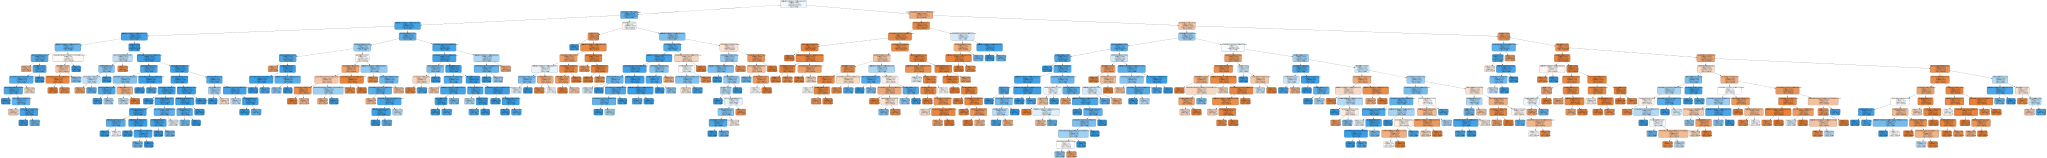

In [118]:
# Visualize the tree in jupyter and save it in a PNG file
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names = [
                             'Couleur moyenne du centre [0]',
                             'Couleur moyenne du centre [1]',
                             'Couleur moyenne du centre [2] ',
                             'Couleur moyenne [0]',
                             'Couleur moyenne [1]',
                             'Couleur moyenne [2]',
                             'Standard Deviation [0]',
                             'Standard Deviation [1]',
                             'Standard Deviation [2]',
                             'Distribution Kurtosis [0]',
                             'Distribution Kurtosis [1]',
                             'Distribution Kurtosis [2]',
                             'Distribution normale asymétrique [0]',
                             'Distribution normale asymétrique [1]',
                             'Distribution normale asymétrique [2]',
                             'Coefficient Gini [0]',
                             'Coefficient Gini [1]',
                             'Coefficient Gini [2]',
                             'Excentricité',
                             'Largeur',
                             'Hauteur',
                             'Somme',
                             'Entropie',
                             'Chiralité',
                             'Aire de l’ellipse',
                             'Aire box-to-image',
                             'Décalage du centre (offset)',
                             'Rayon de la lumière [0] ',
                             'Rayon de la lumière [1] ',
                             'Nombre de labels',
                             'Distribution Kurtosis [0] ',
                             'Distribution Kurtosis [1] ',
                             'Distribution Kurtosis [2] ',
                             'Distribution normale asymétrique [0] ',
                             'Distribution normale asymétrique [1] ',
                             'Distribution normale asymétrique [2] ',
                             'Coefficient Gini [0]',
                             'Coefficient Gini [1]',
                             'Coefficient Gini [2]',
                             'Distribution Kurtosis image noir et blanc',
                             'Distribution normale asymétrique image noir et blanc',
                             'Coefficient Gini image noir et blanc',
                             'Couleur du centre [0]',
                             'Couleur du centre [1]',
                             'Couleur du centre [2]',
                             'Couleur moyenne [0]',
                             'Couleur moyenne [1]',
                             'Couleur moyenne [2]',
                             'Couleur moyenne du centre [0]',
                             'Couleur moyenne du centre [1',
                             'Couleur moyenne du centre [2',
                             'Couleur du centre ',
                             'Rapport couleur du centre / moyenne de gris',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                             'Moments de l’image',
                         ],  
                         class_names = ['Smooth', 'Spiral'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("Galaxy_Data") 
graph

In [119]:
'''
Pour l'algorithm de Bayes, les methodes MDLP et 
les la méthode non-supervisée sont des methodes de prétraitement. 
Pour le MDLP, vous pouvez installer le package en suivant les instructions 
de https://github.com/hlin117/mdlp-discretization
Pour la méthode de non-supervisé, vous pouvez faire le prétraitement MinMaxScaler 
(sklearn) à la place.
'''

# In[26]:


# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from scipy.stats.mstats import mquantiles, kurtosis, skew
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [120]:
# Using hold-out evaluation
from sklearn.model_selection import train_test_split
'''
 - Split the data into train and valid, holding 20% of the data into test 
 and 20% for valid
 - This is the split data for Holdout validation and later on use another data 
 split to evaluate the perfomance of k-fold CV.
 -
'''
X_train_spam, X_valid_spam, Y_train_spam, Y_valid_spam = train_test_split(
    X_data_spam, Y_data_spam, test_size=0.4, random_state=0, shuffle=True, stratify=Y_data_spam
)
X_test_spam, X_valid_spam, Y_test_spam, Y_valid_spam = train_test_split(
    X_valid_spam, Y_valid_spam, test_size=0.5, random_state=0, shuffle=True, stratify=Y_valid_spam
)
X_train_galaxy, X_valid_galaxy, Y_train_galaxy, Y_valid_galaxy = train_test_split(
    X_data_galaxy, Y_data_galaxy, test_size=0.4, random_state=0, shuffle=True, stratify=Y_data_galaxy
)
X_test_galaxy, X_valid_galaxy, Y_test_galaxy, Y_valid_galaxy = train_test_split(
    X_valid_galaxy, Y_valid_galaxy, test_size=0.5, random_state=0, shuffle=True, stratify=Y_valid_galaxy
)

In [121]:
# Let's verify we have the statify option work
# We should have the same proportion of non-spam and spam labels inside both data sets
print(Y_train_spam.mean())
print(Y_valid_spam.mean())

print(Y_train_galaxy.mean())
print(Y_valid_galaxy.mean())
count_ones=0
count_zeros=0
for i in Y_train_galaxy:
    if i==0:
        count_zeros+=1
    else:
        count_ones+=1
print ("number of smooth galaxies in train dataset is {} and spiral galaxies {}".format(count_zeros,count_ones))
count_ones=0
count_zeros=0
for i in Y_test_galaxy:
    if i==0:
        count_zeros+=1
    else:
        count_ones+=1
print ("number of smooth galaxies in test dataset is {} and spiral galaxies {}".format(count_zeros,count_ones))

count_ones=0
count_zeros=0
for i in Y_valid_galaxy:
    if i==0:
        count_zeros+=1
    else:
        count_ones+=1
print ("number of smooth galaxies in validation dataset is {} and spiral galaxies {}".format(count_zeros,count_ones))

count_ones=0
count_zeros=0
for i in Y_train_spam:
    if i==0:
        count_zeros+=1
    else:
        count_ones+=1
print ("number of non-spam emails in train dataset is {} and spam emails {}".format(count_zeros,count_ones))
count_ones=0
count_zeros=0
for i in Y_test_spam:
    if i==0:
        count_zeros+=1
    else:
        count_ones+=1
print ("number of non-spam emails in test dataset is {} and spam emails {}".format(count_zeros,count_ones))
count_ones=0
count_zeros=0
for i in Y_valid_spam:
    if i==0:
        count_zeros+=1
    else:
        count_ones+=1
print ("number of non_spam emails in valid dataset is {} and spam emails {}".format(count_zeros,count_ones))

0.4003623188405797
0.4003623188405797
0.519026025236593
0.5189237137788291
number of smooth galaxies in train dataset is 4879 and spiral galaxies 5265
number of smooth galaxies in test dataset is 1626 and spiral galaxies 1756
number of smooth galaxies in validation dataset is 1627 and spiral galaxies 1755
number of non-spam emails in train dataset is 993 and spam emails 663
number of non-spam emails in test dataset is 331 and spam emails 221
number of non_spam emails in valid dataset is 331 and spam emails 221


In [122]:
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#
#
#                                   1: Galaxy
#
#
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################

In [123]:
import graphviz
from sklearn import tree

feature_names = ['Couleur moyenne du centre [0]','Couleur moyenne du centre [1]',
 'Couleur moyenne du centre [2] ','Couleur moyenne [0]','Couleur moyenne [1]',
 'Couleur moyenne [2]','Standard Deviation [0]','Standard Deviation [1]',
 'Standard Deviation [2]','Distribution Kurtosis [0]','Distribution Kurtosis [1]',
 'Distribution Kurtosis [2]','Distribution normale asymétrique [0]','Distribution normale asymétrique [1]',
 'Distribution normale asymétrique [2]','Coefficient Gini [0]','Coefficient Gini [1]',
 'Coefficient Gini [2]','Excentricité','Largeur','Hauteur','Somme','Entropie',
 'Chiralité','Aire de l’ellipse','Aire box-to-image','Décalage du centre (offset)',
 'Rayon de la lumière [0] ','Rayon de la lumière [1] ','Nombre de labels',
 'Distribution Kurtosis [0] ','Distribution Kurtosis [1] ','Distribution Kurtosis [2] ',
 'Distribution normale asymétrique [0]','Distribution normale asymétrique [1] ',
 'Distribution normale asymétrique [2] ','Coefficient Gini [0]','Coefficient Gini [1]',
 'Coefficient Gini [2]','Distribution Kurtosis image noir et blanc',
 'Distribution normale asymétrique image noir et blanc','Coefficient Gini image noir et blanc',
 'Couleur du centre [0]','Couleur du centre [1]','Couleur du centre [2]',
 'Couleur moyenne [0]','Couleur moyenne [1]','Couleur moyenne [2]',
 'Couleur moyenne du centre [0]','Couleur moyenne du centre [1]','Couleur moyenne du centre [2]',
 'Couleur du centre ','Rapport couleur du centre / moyenne de gris','Moments de l’image',
 'Moments de l’image','Moments de l’image','Moments de l’image','Moments de l’image',
 'Moments de l’image','Moments de l’image','Moments de l’image','Moments de l’image',
 'Moments de l’image','Moments de l’image','Moments de l’image','Moments de l’image',
 'Moments de l’image','Moments de l’image','Moments de l’image','Moments de l’image',
 'Moments de l’image','Moments de l’image','Moments de l’image','Moments de l’image',
 'Moments de l’image']

In [124]:
#################################################################################################
#
#                             1.1: Holdout method
#
#################################################################################################

In [125]:
# Train the Decision Tree with the training set max_depth 10
model_depth10 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=10)
model_depth10 = model_depth10.fit(X_train_galaxy, Y_train_galaxy)

# Visualize the tree in jupyter and save it in a PNG file
dot_data = tree.export_graphviz(model_depth10, out_file=None, 
                         feature_names=feature_names,
                         class_names = ['Smooth', 'Spiral'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("SpiralGalaxy_Data", view=True) 
graph 

# predict the class of samples
# validation dataset
Y_validation_pred_max_depth10 = model_depth10.predict(X_valid_galaxy)


In [126]:
# Train the Decision Tree with the training set max_depth 5
model_depth5 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=5)
model_depth5 = model_depth5.fit(X_train_galaxy, Y_train_galaxy)


dot_data = tree.export_graphviz(model_depth5, out_file=None, 
                         feature_names=feature_names,
                         class_names = ['Smooth', 'Spiral'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("SpiralGalaxy_Data", view=True) 
graph 

# predict the class of samples
# validation dataset
Y_validation_pred_max_depth5 = model_depth5.predict(X_valid_galaxy)

In [127]:
# Train the Decision Tree with the training set max_depth 3
model_depth3 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=3)
model_depth3 = model_depth3.fit(X_train_galaxy, Y_train_galaxy)


dot_data = tree.export_graphviz(model_depth3, out_file=None, 
                         feature_names=feature_names,
                         class_names = ['Smooth', 'Spiral'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("SpiralGalaxy_Data", view=True) 
graph 

# predict the class of samples
# validation dataset
Y_validation_pred_max_depth3 = model_depth3.predict(X_valid_galaxy)

In [128]:
# Train the Decision Tree with the training set max_depth None
model_depth_None = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)
model_depth_None = model_depth_None.fit(X_train_galaxy, Y_train_galaxy)


dot_data = tree.export_graphviz(model_depth_None, out_file=None, 
                         feature_names=feature_names,
                         class_names = ['Smooth', 'Spiral'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("SpiralGalaxy_Data_None", view=True) 
graph 

# predict the class of samples
# validation dataset
Y_validation_pred_max_depth_None = model_depth_None.predict(X_valid_galaxy)

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

# Method to plot confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [130]:
acc_galaxy_validation_max_depth10 = accuracy_score(Y_valid_galaxy, Y_validation_pred_max_depth10 )
print("Correct classification rate for validation dataset with max depth 10 = "+str(acc_galaxy_validation_max_depth10*100)+"%")

acc_galaxy_validation_max_depth5 = accuracy_score(Y_valid_galaxy, Y_validation_pred_max_depth5 )
print("Correct classification rate for validation dataset with max depth 5 = "+str(acc_galaxy_validation_max_depth5*100)+"%")

acc_galaxy_validation_max_depth3 = accuracy_score(Y_valid_galaxy, Y_validation_pred_max_depth3 )
print("Correct classification rate for validation dataset with max depth 3 = "+str(acc_galaxy_validation_max_depth3*100)+"%")

acc_galaxy_validation_max_depth_None = accuracy_score(Y_valid_galaxy, Y_validation_pred_max_depth_None )
print("Correct classification rate for validation dataset with max depth None = "+str(acc_galaxy_validation_max_depth_None*100)+"%")

Correct classification rate for validation dataset with max depth 10 = 91.45476049674748%
Correct classification rate for validation dataset with max depth 5 = 89.2962743938498%
Correct classification rate for validation dataset with max depth 3 = 86.2803075103489%
Correct classification rate for validation dataset with max depth None = 91.04080425783559%


In [131]:
from sklearn.metrics import precision_recall_fscore_support

max_depth = 10
precision is 0.9146220733637743 and F1-score is 0.9145617178917054

max_depth = 5
precision is 0.8929907351968074 and F1-score is 0.8929717390406939

max_depth = 3
precision is 0.8657658325291496 and F1-score is 0.8622243485020191

max_depth = None
precision is 0.9105301593170531 and F1-score is 0.9104269772497112


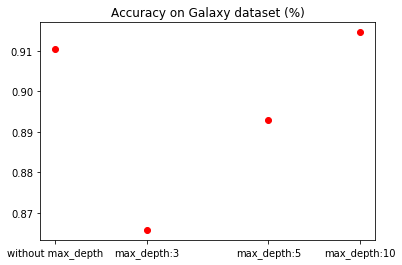

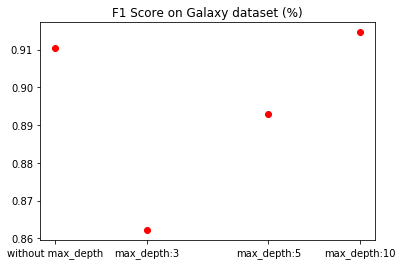

'\nBased on the accuracy and f1-score, the perfomance of model without max_depth \nis comparable to max_depth=10. Hence, we choose model without max_depth.\n'

In [132]:
# evaluating different hyperparameters for Decision tree models(i.e. Accuracy & F1_Score)
print("max_depth = 10")
# precision_recall_fscore allows us to get both the precision and f1 score in the same call
precision10,_,fbeta_score10,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_max_depth10,average="weighted")
print ("precision is {} and F1-score is {}".format(precision10,fbeta_score10))

print("\nmax_depth = 5")
precision5,_,fbeta_score5,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_max_depth5,average="weighted")
print ("precision is {} and F1-score is {}".format(precision5,fbeta_score5))

print("\nmax_depth = 3")
precision3,_,fbeta_score3,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_max_depth3,average="weighted")
print ("precision is {} and F1-score is {}".format(precision3,fbeta_score3))

print("\nmax_depth = None")
precision_None,_,fbeta_score_None,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_max_depth_None,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_None,fbeta_score_None))

plt.figure("Accuracy")
plt.title("Accuracy on Galaxy dataset (%)")
x_precision = np.array([0,3,7,10])
y_precision = np.array([precision_None,precision3,precision5,precision10])
my_xticks = ['without max_depth','max_depth:3','max_depth:5','max_depth:10']
plt.xticks(x_precision, my_xticks)
plt.plot(x_precision, y_precision,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Galaxy dataset (%)")
x_F1Score = np.array([0,3,7,10])
y_F1Score = np.array([fbeta_score_None,fbeta_score3,fbeta_score5,fbeta_score10])
my_xticks = ['without max_depth','max_depth:3','max_depth:5','max_depth:10']
plt.xticks(x_F1Score, my_xticks)
plt.plot(x_F1Score, y_F1Score,'ro')
plt.show()

'''
Based on the accuracy and f1-score, the perfomance of model without max_depth 
is comparable to max_depth=10. Hence, we choose model without max_depth.
'''

Correct classification rate for Test dataset with max depth None = 91.07037256061503%
Confusion matrix, without normalization
[[1492  134]
 [ 168 1588]]
Normalized confusion matrix
[[0.92 0.08]
 [0.1  0.9 ]]


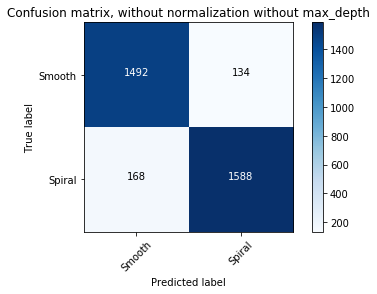

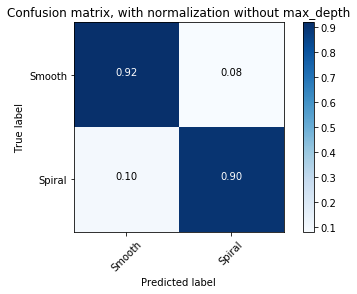

In [133]:
# Evaluating Test Dataset for galaxy with the chosen hyperparameter (i.e. Without max_depth)
Y_Test_pred_max_depth_None = model_depth_None.predict(X_test_galaxy)

acc_galaxy_test_max_depth_None = accuracy_score(Y_test_galaxy, Y_Test_pred_max_depth_None )
print("Correct classification rate for Test dataset with max depth None = "+str(acc_galaxy_test_max_depth_None*100)+"%")
cm_galaxy_test_max_depth_None = confusion_matrix(Y_test_galaxy, Y_Test_pred_max_depth_None )

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix for max depth =7
plt.figure()
plot_confusion_matrix(cm_galaxy_test_max_depth_None, classes= ['Smooth', 'Spiral'],
                      title='Confusion matrix, without normalization without max_depth')
plt.figure()
plot_confusion_matrix(cm_galaxy_test_max_depth_None, classes= ['Smooth', 'Spiral'], normalize=True,
                      title='Confusion matrix, with normalization without max_depth')
plt.show()

In [134]:
# We are going to build K_NN models with different hyper-parameter combination and 
# go through the whole training, validation process for every combination
print("       K_NN models with hold-out set ")

# Scale data for train, validation (hold out), and test
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xtrain_galaxy_s = standard_scaler.fit_transform(X_train_galaxy)
Xtest_galaxy_s = standard_scaler.transform(X_test_galaxy)
Xvalid_galaxy_s = standard_scaler.transform(X_valid_galaxy)

       K_NN models with hold-out set 


In [135]:
#Classify using k-NN for k=3,5,10 and weight=uniform
from sklearn.neighbors import KNeighborsClassifier
print("k=3 and weight= uniform")
knn_3u = KNeighborsClassifier(n_neighbors=3, weights="uniform")
knn_3u.fit(Xtrain_galaxy_s, Y_train_galaxy)

Y_validation_pred_3u = knn_3u.predict(X_valid_galaxy)

print("k=5 and weight= uniform")
knn_5u = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn_5u.fit(Xtrain_galaxy_s, Y_train_galaxy)

Y_validation_pred_5u = knn_5u.predict(X_valid_galaxy)

print("k=10 and weight= uniform")
knn_10u = KNeighborsClassifier(n_neighbors=10, weights="uniform")
knn_10u.fit(Xtrain_galaxy_s, Y_train_galaxy)

Y_validation_pred_10u = knn_10u.predict(X_valid_galaxy)

acc_galaxy_validation_3u = accuracy_score(Y_valid_galaxy, Y_validation_pred_3u )
print("Correct classification rate for validation dataset with k=3 and weight: uniform = "+str(round(acc_galaxy_validation_3u*100, 4))+"%")
acc_galaxy_validation_5u = accuracy_score(Y_valid_galaxy, Y_validation_pred_5u )
print("Correct classification rate for validation dataset with k=5 and weight: uniform = "+str(round(acc_galaxy_validation_5u*100, 4))+"%")
acc_galaxy_validation_10u = accuracy_score(Y_valid_galaxy, Y_validation_pred_10u )
print("Correct classification rate for validation dataset with k=10 and weight: uniform = "+str(round(acc_galaxy_validation_10u*100, 4))+"%")

k=3 and weight= uniform
k=5 and weight= uniform
k=10 and weight= uniform
Correct classification rate for validation dataset with k=3 and weight: uniform = 51.9811%
Correct classification rate for validation dataset with k=5 and weight: uniform = 51.9811%
Correct classification rate for validation dataset with k=10 and weight: uniform = 51.9515%


In [136]:
#Classify using k-NN for k=3,5,10 and weight=distance
print("k=3 and weight=distance")
knn_3d = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn_3d.fit(Xtrain_galaxy_s, Y_train_galaxy)

Y_validation_pred_3d = knn_3u.predict(X_valid_galaxy)

print("k=5 and weight=distance")
knn_5d = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn_5d.fit(Xtrain_galaxy_s, Y_train_galaxy)

Y_validation_pred_5d = knn_5d.predict(X_valid_galaxy)

print("k=10 and weight=distance")
knn_10d = KNeighborsClassifier(n_neighbors=10, weights="distance")
knn_10d.fit(Xtrain_galaxy_s, Y_train_galaxy)

Y_validation_pred_10d = knn_10d.predict(X_valid_galaxy)

acc_galaxy_validation_3d = accuracy_score(Y_valid_galaxy, Y_validation_pred_3d )
print("Correct classification rate for validation dataset with k=3 and weight: distance = "+str(round(acc_galaxy_validation_3d*100, 4))+"%")

acc_galaxy_validation_5d = accuracy_score(Y_valid_galaxy, Y_validation_pred_5d )
print("Correct classification rate for validation dataset with k=5 and weight: distance = "+str(round(acc_galaxy_validation_5d*100, 4))+"%")

acc_galaxy_validation_10d = accuracy_score(Y_valid_galaxy, Y_validation_pred_10d )
print("Correct classification rate for validation dataset with k=10 and weight: distance = "+str(round(acc_galaxy_validation_10d*100, 4))+"%")

k=3 and weight=distance
k=5 and weight=distance
k=10 and weight=distance
Correct classification rate for validation dataset with k=3 and weight: distance = 51.9811%
Correct classification rate for validation dataset with k=5 and weight: distance = 51.9811%
Correct classification rate for validation dataset with k=10 and weight: distance = 51.9515%


k=10 and weight=uniform
precision is 0.5901705070426745 and F1-score is 0.3569361026527287

k=5 and weight=uniform
precision is 0.654387885348884 and F1-score is 0.3570706855102339

k=3 and weight=uniform
precision is 0.7505971852095832 and F1-score is 0.35654727147580695

k=10 and weight=distance
precision is 0.5901705070426745 and F1-score is 0.3569361026527287

k=5 and weight=distance
precision is 0.654387885348884 and F1-score is 0.3570706855102339

k=3 and weight=distance
precision is 0.7505971852095832 and F1-score is 0.35654727147580695


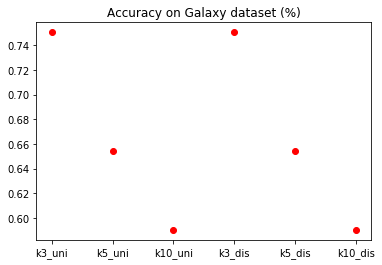

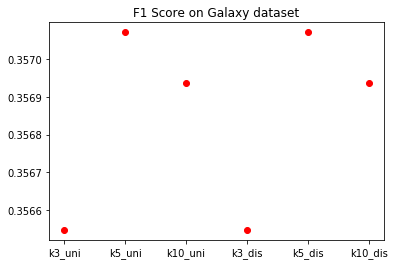

'\nBased on the accuracy and f1-score, the perfomance of model is the same for both weights\n,hence we choose k=3 and uniform.\n'

In [137]:
# evaluating different hyperparameters for Decision tree models(i.e. Accuracy & F1_Score)
print("k=10 and weight=uniform")
precision10u,_,fbeta_score10u,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_10u,average="weighted")
print ("precision is {} and F1-score is {}".format(precision10u,fbeta_score10u))
print("\nk=5 and weight=uniform")
precision5u,_,fbeta_score5u,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_5u,average="weighted")
print ("precision is {} and F1-score is {}".format(precision5u,fbeta_score5u))

print("\nk=3 and weight=uniform")
precision3u,_,fbeta_score3u,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_3u,average="weighted")
print ("precision is {} and F1-score is {}".format(precision3u,fbeta_score3u))

print("\nk=10 and weight=distance")
precision10d,_,fbeta_score10d,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_10d,average="weighted")
print ("precision is {} and F1-score is {}".format(precision10d,fbeta_score10d))

print("\nk=5 and weight=distance")
precision5d,_,fbeta_score5d,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_5d,average="weighted")
print ("precision is {} and F1-score is {}".format(precision5d,fbeta_score5d))

print("\nk=3 and weight=distance")
precision3d,_,fbeta_score3d,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_3d,average="weighted")
print ("precision is {} and F1-score is {}".format(precision3d,fbeta_score3d))

plt.figure("Accuracy")
plt.title("Accuracy on Galaxy dataset (%)")
x_precision = np.array([0,2,4,6,8,10])
y_precision = np.array([precision3u,precision5u,precision10u,precision3d,precision5d,precision10d])
my_xticks = ['k3_uni','k5_uni','k10_uni','k3_dis','k5_dis','k10_dis']
plt.xticks(x_precision, my_xticks)
plt.plot(x_precision, y_precision,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Galaxy dataset")
x_F1Score = np.array([0,2,4,6,8,10])
y_F1Score = np.array([fbeta_score3u,fbeta_score5u,fbeta_score10u,fbeta_score3d,fbeta_score5d,fbeta_score10d])
my_xticks = ['k3_uni','k5_uni','k10_uni','k3_dis','k5_dis','k10_dis']
plt.xticks(x_F1Score, my_xticks)
plt.plot(x_F1Score, y_F1Score,'ro')
plt.show()

'''
Based on the accuracy and f1-score, the perfomance of model is the same for both weights
,hence we choose k=3 and uniform.
'''

Correct classification rate for Test dataset with k:3 & weight=uniform = 51.95150798344174%
Confusion matrix, without normalization
[[   1 1625]
 [   0 1756]]
Normalized confusion matrix
[[6.15e-04 9.99e-01]
 [0.00e+00 1.00e+00]]


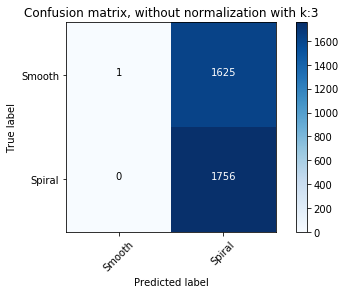

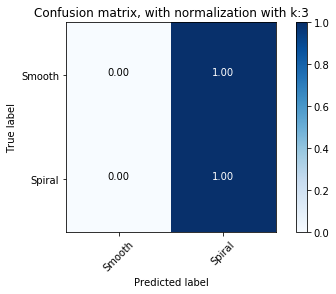

In [138]:
# Evaluating Test Dataset for galaxy with the chosen hyperparameter (i.e. k=3 and weight=uniform)
Y_Test_pred_k3u = knn_3u.predict(X_test_galaxy)

acc_galaxy_test_k3u = accuracy_score(Y_test_galaxy, Y_Test_pred_k3u )
print("Correct classification rate for Test dataset with k:3 & weight=uniform = "+str(acc_galaxy_test_k3u*100)+"%")
cm_galaxy_test_k3u= confusion_matrix(Y_test_galaxy, Y_Test_pred_k3u )

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix for max depth =7
plt.figure()
plot_confusion_matrix(cm_galaxy_test_k3u, classes= ['Smooth', 'Spiral'],
                      title='Confusion matrix, without normalization with k:3')
plt.figure()
plot_confusion_matrix(cm_galaxy_test_k3u, classes= ['Smooth', 'Spiral'], normalize=True,
                      title='Confusion matrix, with normalization with k:3')
plt.show()

In [139]:
print("       Bayes Naif models with hold-out set ")

# Scale data for train, validation (hold out), and test
# first method of discretization using MDLP
from mdlp.discretization import MDLP
mdlp = MDLP()
Xtrain_galaxy_MDLP = mdlp.fit_transform(X_train_galaxy, Y_train_galaxy)
Xtest_galaxy_MDLP = mdlp.transform(X_test_galaxy, Y_test_galaxy)
Xvalid_galaxy_MDLP = mdlp.transform(X_valid_galaxy, Y_valid_galaxy)

       Bayes Naif models with hold-out set 


In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_galaxy_unsupervised = scaler.fit_transform(X_train_galaxy)
Xtest_galaxy_unsupervised = scaler.transform(X_test_galaxy)
Xvalid_galaxy_unsupervised= scaler.transform(X_valid_galaxy)

In [141]:
# Bayes naïf gaussien with three different parameters i.e. 
# 1. priors = probaility of each class

# In[33]:
from sklearn.naive_bayes import GaussianNB
GaussianClassifier_priors = GaussianNB(priors=[galaxy_smooth_ratio, galaxy_spiral_ratio])
print("Bayes naïf gaussien & priors = probaility of each class")
GaussianClassifier_priors=GaussianClassifier_priors.fit(X_train_galaxy, Y_train_galaxy)
Y_validation_pred_Gaussian_priors = GaussianClassifier_priors.predict(X_valid_galaxy)

Bayes naïf gaussien & priors = probaility of each class


In [142]:
# Bayes naïf multinomial with three different parameters i.e. 
# 1. priors = probaility of each class
# 2. MDLP discretization
# 3. unsupervised discretization
from sklearn.naive_bayes import MultinomialNB
print("Bayes naïf multinomial & priors = probaility of each class")
MultinomialNBClassifier_priors = MultinomialNB(class_prior=[galaxy_smooth_ratio, galaxy_spiral_ratio], fit_prior=True)
MultinomialNBClassifier_priors=MultinomialNBClassifier_priors.fit(Xtrain_galaxy_MDLP,Y_train_galaxy)
Y_validation_pred_Multinomial_priors = MultinomialNBClassifier_priors.predict(Xvalid_galaxy_MDLP)

Bayes naïf multinomial & priors = probaility of each class


Bayes naïf multinomial & MDLP discretization
Bayes naïf multinomial & unsupervised discretization
Correct classification rate for validation dataset with Gaussian = 79.86398580721466%
Correct classification rate for validation dataset with multinomial priors = 82.99822590183324%
Correct classification rate for validation dataset with multinomial MDLP = 82.99822590183324%
Correct classification rate for validation dataset with multinomial unsupervised = 81.43110585452395%
Gaussian 
precision is 0.807290571084978 and F1-score is 0.7979996723532655

 Bayes naïf multinomial & priors
precision is 0.8304765113987199 and F1-score is 0.8300406617440889

 Bayes naïf multinomial & MDLP
precision is 0.8304765113987199 and F1-score is 0.8300406617440889

 Bayes naïf multinomial & unsupervised
precision is 0.8144235932370194 and F1-score is 0.8141432816736224


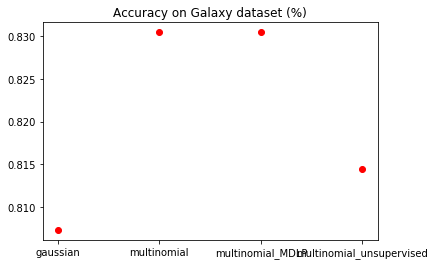

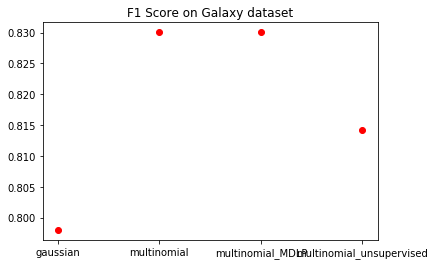

In [143]:
MultinomialNBClassifier_discret=MultinomialNB()
print("Bayes naïf multinomial & MDLP discretization")
MultinomialNBClassifier_discret_MDLP=MultinomialNBClassifier_discret.fit(Xtrain_galaxy_MDLP, Y_train_galaxy)
Y_validation_pred_Multinomial_discret_MDLP = MultinomialNBClassifier_discret_MDLP.predict(Xvalid_galaxy_MDLP)

print("Bayes naïf multinomial & unsupervised discretization")
MultinomialNBClassifier_discret_unsupervised=MultinomialNBClassifier_discret.fit(Xtrain_galaxy_unsupervised, Y_train_galaxy)
Y_validation_pred_Multinomial_discret_unsupervised = MultinomialNBClassifier_discret_unsupervised.predict(Xvalid_galaxy_unsupervised)

acc_galaxy_validation_Gaussian = accuracy_score(Y_valid_galaxy, Y_validation_pred_Gaussian_priors )
print("Correct classification rate for validation dataset with Gaussian = "+str(acc_galaxy_validation_Gaussian*100)+"%")
acc_galaxy_validation_multinomial_priors = accuracy_score(Y_valid_galaxy, Y_validation_pred_Multinomial_priors )
print("Correct classification rate for validation dataset with multinomial priors = "+str(acc_galaxy_validation_multinomial_priors*100)+"%")
acc_galaxy_validation_multinomial_MDLP = accuracy_score(Y_valid_galaxy, Y_validation_pred_Multinomial_discret_MDLP )
print("Correct classification rate for validation dataset with multinomial MDLP = "+str(acc_galaxy_validation_multinomial_MDLP*100)+"%")
acc_galaxy_validation_multinomial_unsupervised = accuracy_score(Y_valid_galaxy, Y_validation_pred_Multinomial_discret_unsupervised )
print("Correct classification rate for validation dataset with multinomial unsupervised = "+str(acc_galaxy_validation_multinomial_unsupervised*100)+"%")

print("Gaussian ")
precision_gaussian,_,fbeta_score_gaussian,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_Gaussian_priors,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_gaussian,fbeta_score_gaussian))
print("\n Bayes naïf multinomial & priors")
precision_multinomial_priors,_,fbeta_score_multinomial_priors,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_Multinomial_priors,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_multinomial_priors,fbeta_score_multinomial_priors))
print("\n Bayes naïf multinomial & MDLP")
precision_multinomial_MDLP,_,fbeta_score_multinomial_MDLP,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_Multinomial_discret_MDLP,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_multinomial_MDLP,fbeta_score_multinomial_MDLP))
print("\n Bayes naïf multinomial & unsupervised")
precision_multinomial_unsupervised,_,fbeta_score_multinomial_unsupervised,_=precision_recall_fscore_support(Y_valid_galaxy,Y_validation_pred_Multinomial_discret_unsupervised,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_multinomial_unsupervised,fbeta_score_multinomial_unsupervised))

plt.figure("Accuracy")
plt.title("Accuracy on Galaxy dataset (%)")
x_precision = np.array([0,2,4,6])
y_precision = np.array([precision_gaussian,precision_multinomial_priors,precision_multinomial_MDLP,precision_multinomial_unsupervised])
my_xticks = ['gaussian','multinomial','multinomial_MDLP','multinomial_unsupervised']
plt.xticks(x_precision, my_xticks)
plt.plot(x_precision, y_precision,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Galaxy dataset")
x_F1Score = np.array([0,2,4,6])
y_F1Score = np.array([fbeta_score_gaussian,fbeta_score_multinomial_priors,fbeta_score_multinomial_MDLP,fbeta_score_multinomial_unsupervised])
my_xticks = ['gaussian','multinomial','multinomial_MDLP','multinomial_unsupervised']
plt.xticks(x_F1Score, my_xticks)
plt.plot(x_F1Score, y_F1Score,'ro')
plt.show()


Correct classification rate for Test dataset with gaussian = 77.94204612655233%
Confusion matrix, without normalization
[[1399  227]
 [ 519 1237]]
Normalized confusion matrix
[[0.86 0.14]
 [0.3  0.7 ]]


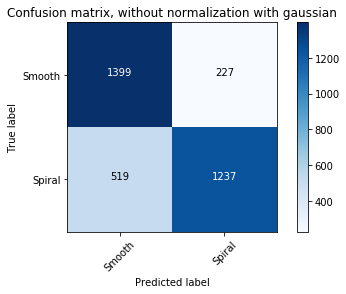

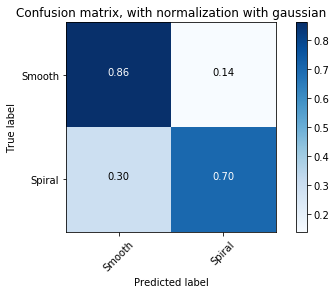

In [144]:
# Evaluating Test Dataset for galaxy with the chosen hyperparameter (i.e. Despite the better results with multinomial MDLP during validation step,
# but, with test dataset, model gaussian gives the best result!!! 48% vs 71%)
Y_Test_pred_gaussian = GaussianClassifier_priors.predict(X_test_galaxy)
acc_galaxy_test_gaussian = accuracy_score(Y_test_galaxy, Y_Test_pred_gaussian )
print("Correct classification rate for Test dataset with gaussian = "+str(acc_galaxy_test_gaussian*100)+"%")
cm_galaxy_test_gaussian= confusion_matrix(Y_test_galaxy, Y_Test_pred_gaussian )

np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_galaxy_test_gaussian, classes= ['Smooth', 'Spiral'],
                      title='Confusion matrix, without normalization with gaussian')
plt.figure()
plot_confusion_matrix(cm_galaxy_test_gaussian, classes= ['Smooth', 'Spiral'], normalize=True,
                      title='Confusion matrix, with normalization with gaussian')
plt.show()

In [145]:
#################################################################################################
#
#                             1.2: KFold method
#
#################################################################################################

In [146]:
# - Split the data into train and valid, holding 20% of the data into valid
# - We are suffling the data to avoid ordered data by labels
# - Stratification means that the train_test_split method returns
#   training and test subsets that have the same proportions of class labels as the input dataset.
# - Random_state is desirable for reproducibility.
from sklearn.model_selection import train_test_split

X_train_galaxy, X_test_galaxy, Y_train_galaxy, Y_test_galaxy = train_test_split(
    X_data_galaxy, Y_data_galaxy, test_size=0.2, random_state=0, shuffle=True, stratify=Y_data_galaxy
)

In [147]:
#################################################################################################
#
#                             1.2.1: KFold - Decision Tree
#
#################################################################################################

Decision Tree with 10 folds (max_depth=3)

Correct classification rate for fold #1: 86.4542% (max_depth=3, f1_score=0.8622)
Correct classification rate for fold #2: 86.1703% (max_depth=3, f1_score=0.8608)
Correct classification rate for fold #3: 86.4613% (max_depth=3, f1_score=0.8621)
Correct classification rate for fold #4: 86.0586% (max_depth=3, f1_score=0.8567)
Correct classification rate for fold #5: 86.4939% (max_depth=3, f1_score=0.8646)
Correct classification rate for fold #6: 87.5179% (max_depth=3, f1_score=0.874)
Correct classification rate for fold #7: 86.2053% (max_depth=3, f1_score=0.8615)
Correct classification rate for fold #8: 86.0542% (max_depth=3, f1_score=0.8574)
Correct classification rate for fold #9: 86.7172% (max_depth=3, f1_score=0.865)
Correct classification rate for fold #10: 86.7169% (max_depth=3, f1_score=0.8658)

Correct classification rate: 86.485%
F1 Score: 0.863


Decision Tree with 10 folds (max_depth=5)

Correct classification rate for fold #1: 89.5178%

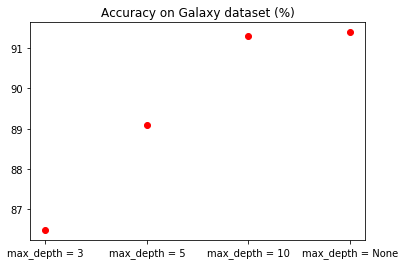

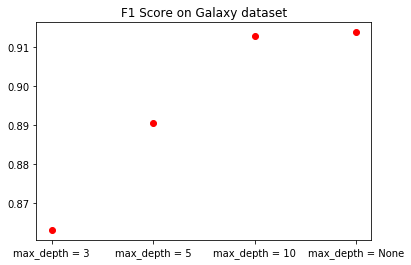

In [148]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn import tree

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

max_depths = np.array([3, 5, 10, None])
precisions = []
f1_scores = []

for i in range(0, 4):
    print("Decision Tree with 10 folds (max_depth=" + str(max_depths[i]) + ")\n")
    sum_precision = 0;
    sum_f1_score = 0;
    fold_counter = 0
    for train_index, test_index in skf.split(X_train_galaxy, Y_train_galaxy):
        X_train, X_valid = X_train_galaxy[train_index], X_train_galaxy[test_index];
        Y_train, Y_valid = Y_train_galaxy[train_index], Y_train_galaxy[test_index];

        model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=max_depths[i])
        model = model.fit(X_train, Y_train)

        Y_valid_pred = model.predict(X_valid)
        
        precision,_,f1_score,_ = precision_recall_fscore_support(Y_valid, Y_valid_pred, average="weighted")
        
        fold_counter += 1
        sum_precision += precision;
        sum_f1_score += f1_score;
        
        print("Correct classification rate for fold #" + str(fold_counter) + ": " + str(round(precision * 100, 4)) + "% (max_depth=" + str(max_depths[i]) + ", f1_score=" + str(round(f1_score, 4)) + ")")
    precisions.append((sum_precision / 10) * 100)
    f1_scores.append((sum_f1_score / 10))
    print("\nCorrect classification rate: " + str(round((sum_precision / 10) * 100, 4)) + "%")
    print("F1 Score: " + str(round((sum_f1_score / 10), 4)) + "\n\n")

plt.figure("Accuracy")
plt.title("Accuracy on Galaxy dataset (%)")
x_values = np.array([0,2,4,6])
y_values = np.array(precisions)
my_xticks = ['max_depth = 3','max_depth = 5','max_depth = 10','max_depth = None']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Galaxy dataset")
x_values = np.array([0,2,4,6])
y_values = np.array(f1_scores)
my_xticks = ['max_depth = 3','max_depth = 5','max_depth = 10','max_depth = None']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')
plt.show()

In [149]:
#We keep the best one, max_depth=None
max_depth_none = [precisions[3], f1_scores[3]]
print(max_depth_none)

[91.39495739216773, 0.9137302372941715]


In [150]:
#################################################################################################
#
#                             1.2.2: KFold - Naive Bayes
#
#################################################################################################

In [151]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn import tree
from mdlp.discretization import MDLP
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

sum_precision = 0
sum_f1_score = 0
fold_counter = 0

precisions_bayes = []
f1_scores_bayes = []

print("Naive Bayes Gaussian (priors) with 10 folds\n")

# Loop through the 10 folds
for train_index, test_index in skf.split(X_train_galaxy, Y_train_galaxy):
    X_train, X_valid = X_train_galaxy[train_index], X_train_galaxy[test_index];
    Y_train, Y_valid = Y_train_galaxy[train_index], Y_train_galaxy[test_index];

    model = GaussianNB(priors=[galaxy_smooth_ratio, galaxy_spiral_ratio])
    model = model.fit(X_train, Y_train)
    
    Y_valid_pred = model.predict(X_valid)
        
    precision,_,f1_score,_ = precision_recall_fscore_support(Y_valid, Y_valid_pred, average="weighted")
    
    fold_counter += 1
    sum_precision += precision;
    sum_f1_score += f1_score;
    
    print("Correct classification rate for fold #" + str(fold_counter) + ": " + str(round(precision * 100, 4)) + "%")

# Keep track of scores for graphs later
precisions_bayes.append((sum_precision / 10) * 100)
f1_scores_bayes.append((sum_f1_score / 10))

print("\nCorrect classification rate: " + str(round((sum_precision / 10) * 100, 4)) + "%")
print("F1 Score: " + str(round((sum_precision / 10), 4)))

Naive Bayes Gaussian (priors) with 10 folds

Correct classification rate for fold #1: 82.5254%
Correct classification rate for fold #2: 78.8123%
Correct classification rate for fold #3: 80.8122%
Correct classification rate for fold #4: 77.7472%
Correct classification rate for fold #5: 80.2793%
Correct classification rate for fold #6: 78.4309%
Correct classification rate for fold #7: 80.1894%
Correct classification rate for fold #8: 81.9835%
Correct classification rate for fold #9: 81.5034%
Correct classification rate for fold #10: 77.3705%

Correct classification rate: 79.9654%
F1 Score: 0.7997


In [152]:
from sklearn.naive_bayes import MultinomialNB
from mdlp.discretization import MDLP

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
mdlp = MDLP()

sum_precision = 0
sum_f1_score = 0
fold_counter = 0

print("Naive Bayes Multinomial (priors + MDLP) with 10 folds\n")

# Loop through the 10 folds
for train_index, test_index in skf.split(X_train_galaxy, Y_train_galaxy):
    X_train, X_valid = X_train_galaxy[train_index], X_train_galaxy[test_index];
    Y_train, Y_valid = Y_train_galaxy[train_index], Y_train_galaxy[test_index];
    
    X_train_mdlp = mdlp.fit_transform(X_train, Y_train)
    X_valid_mdlp = mdlp.transform(X_valid, Y_valid)

    model = MultinomialNB(class_prior=[galaxy_smooth_ratio, galaxy_spiral_ratio], fit_prior=True)
    model = model.fit(X_train_mdlp, Y_train)
    
    Y_valid_pred = model.predict(X_valid_mdlp)
        
    precision,_,f1_score,_ = precision_recall_fscore_support(Y_valid, Y_valid_pred, average="weighted")
    
    sum_precision += precision;
    sum_f1_score += f1_score;
    fold_counter += 1
    
    print("Correct classification rate for fold #" + str(fold_counter) + ": " + str(round(precision * 100, 4)) + "%")
    
# Keep track of scores for graphs later
precisions_bayes.append((sum_precision / 10) * 100)
f1_scores_bayes.append((sum_f1_score / 10))

print("\nCorrect classification rate: " + str(round((sum_precision / 10) * 100, 4)) + "%")
print("F1 Score: " + str(round((sum_f1_score / 10), 4)))

Naive Bayes Multinomial (priors + MDLP) with 10 folds

Correct classification rate for fold #1: 80.6784%
Correct classification rate for fold #2: 82.0067%
Correct classification rate for fold #3: 80.9176%
Correct classification rate for fold #4: 80.2069%
Correct classification rate for fold #5: 80.7185%
Correct classification rate for fold #6: 81.5654%
Correct classification rate for fold #7: 83.4806%
Correct classification rate for fold #8: 82.2408%
Correct classification rate for fold #9: 82.4445%
Correct classification rate for fold #10: 80.2063%

Correct classification rate: 81.4466%
F1 Score: 0.8135


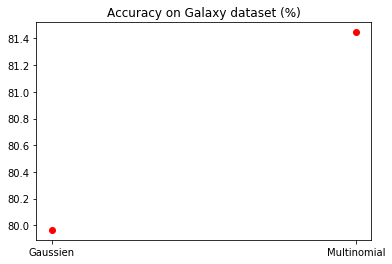

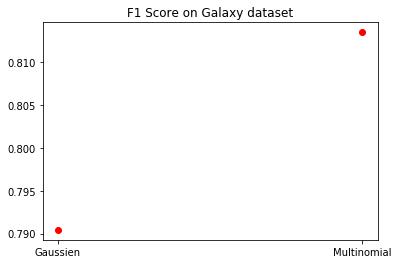

In [153]:
plt.figure("Accuracy")
plt.title("Accuracy on Galaxy dataset (%)")
x_values = np.array([0,2])
y_values = np.array(precisions_bayes)
my_xticks = ['Gaussien','Multinomial']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

plt.figure("F1 Score")
x_values = np.array([0,2])
y_values = np.array(f1_scores_bayes)
my_xticks = ['Gaussien','Multinomial']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')
plt.title("F1 Score on Galaxy dataset")
plt.show()

In [154]:
#################################################################################################
#
#                             1.2.3: KFold - KNN
#
#################################################################################################

In [155]:
from sklearn import neighbors

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
mdlp = MDLP()

# we create an instance of Neighbours Classifier and train with the training dataset.
metric = 'euclidean'
algorithm = 'brute'

hyperparameter_k = [3, 5, 10]
hyperparameter_weight = ['distance', 'uniform']

precisions_knn = []
f1_scores_knn = []

# Loop through hyperparameter 'weight'
for i in range (0, 2):
    for j in range(0, 3):
        print("KNN with 10 folds (k=" + str(hyperparameter_k[j]) + ", weight=" + str(hyperparameter_weight[i]) + ")\n")

        sum_precision = 0
        sum_f1_score = 0
        fold_counter = 0

        for train_index, test_index in skf.split(X_train_galaxy, Y_train_galaxy):
            X_train, X_valid = X_train_galaxy[train_index], X_train_galaxy[test_index]
            Y_train, Y_valid = Y_train_galaxy[train_index], Y_train_galaxy[test_index]

            model = neighbors.KNeighborsClassifier(hyperparameter_k[j], weights=hyperparameter_weight[i], algorithm=algorithm, metric=metric)
            model = model.fit(X_train, Y_train)

            Y_valid_pred = model.predict(X_valid)

            precision,_,f1_score,_ = precision_recall_fscore_support(Y_valid, Y_valid_pred, average="weighted")

            sum_precision += precision;
            sum_f1_score += f1_score;
            fold_counter += 1
            print("Correct classification rate for fold #" + str(fold_counter) + ": " + str(round(precision * 100, 4)) + "%")
        
        precisions_knn.append((sum_precision / 10) * 100)
        f1_scores_knn.append((sum_f1_score / 10))
        print("\nCorrect classification rate: " + str(round((sum_precision / 10) * 100, 4)) + "%")
        print("F1 Score: " + str(round((sum_f1_score / 10), 4)) + "\n\n")


KNN with 10 folds (k=3, weight=distance)

Correct classification rate for fold #1: 55.3525%
Correct classification rate for fold #2: 53.2736%
Correct classification rate for fold #3: 55.2008%
Correct classification rate for fold #4: 55.0836%
Correct classification rate for fold #5: 55.1602%
Correct classification rate for fold #6: 53.3311%
Correct classification rate for fold #7: 54.5706%
Correct classification rate for fold #8: 55.9158%
Correct classification rate for fold #9: 53.8733%
Correct classification rate for fold #10: 54.8387%

Correct classification rate: 54.66%
F1 Score: 0.5466


KNN with 10 folds (k=5, weight=distance)

Correct classification rate for fold #1: 56.4968%
Correct classification rate for fold #2: 54.0391%
Correct classification rate for fold #3: 55.9817%
Correct classification rate for fold #4: 55.6815%
Correct classification rate for fold #5: 55.8592%
Correct classification rate for fold #6: 55.3639%
Correct classification rate for fold #7: 54.3317%
Correct c

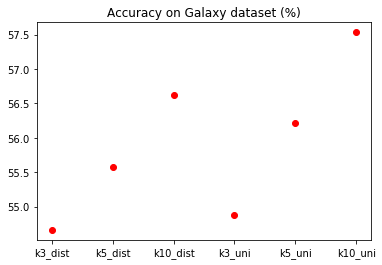

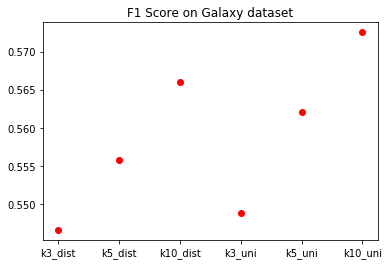

In [156]:
plt.figure("Accuracy")
plt.title("Accuracy on Galaxy dataset (%)")
x_values = np.array([0,2,4,6,8,10])
y_values = np.array(precisions_knn)
my_xticks = ['k3_dist','k5_dist','k10_dist','k3_uni','k5_uni','k10_uni']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Galaxy dataset")
x_values = np.array([0,2,4,6,8,10])
y_values = np.array(f1_scores_knn)
my_xticks = ['k3_dist','k5_dist','k10_dist','k3_uni','k5_uni','k10_uni']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')


In [157]:
# The mode with the best result is the Decision tree with max_depth=None
# Let's validate the test set

model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=None)
model = model.fit(X_train_galaxy, Y_train_galaxy)

Y_test_pred = model.predict(X_test_galaxy)

precision,_,f1_score,_ = precision_recall_fscore_support(Y_test_galaxy, Y_test_pred, average="weighted")

print("\nCorrect classification rate: " + str(round(precision * 100, 4)) + "%")
print("F1 Score: " + str(round(f1_score, 4)) + "\n\n")


Correct classification rate: 91.577%
F1 Score: 0.9155




[79.96541273890278, 81.44655659675237]


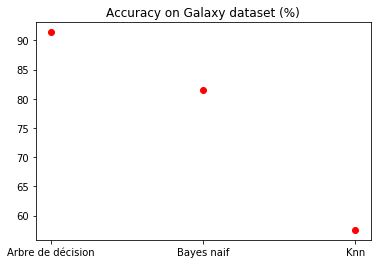

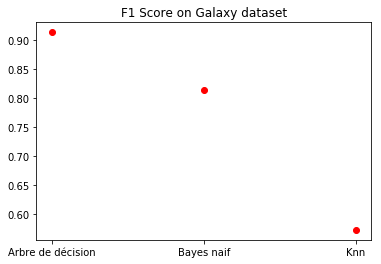

In [158]:
precisions_best = [max_depth_none[0], precisions_bayes[1], precisions_knn[5]]
f1_scores_best = [max_depth_none[1], f1_scores_bayes[1], f1_scores_knn[5]]

print(precisions_bayes)
plt.figure("Accuracy")
plt.title("Accuracy on Galaxy dataset (%)")
x_values = np.array([0,2,4])
y_values = np.array(precisions_best)
my_xticks = ['Arbre de décision','Bayes naif','Knn']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Galaxy dataset")
x_values = np.array([0,2,4])
y_values = np.array(f1_scores_best)
my_xticks = ['Arbre de décision','Bayes naif','Knn']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

In [159]:
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#
#
#                                   2: SPAM
#
#
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################
#####################################################################################

In [160]:
import graphviz
from sklearn import tree

feature_names = ['word_freq_WORD [1]',
                 'word_freq_WORD [2]',
                 'word_freq_WORD [3]',
                 'word_freq_WORD [4]',
                 'word_freq_WORD [5]',
                 'word_freq_WORD [6]',
                 'word_freq_WORD [7]',
                 'word_freq_WORD [8]',
                 'word_freq_WORD [9]',
                 'word_freq_WORD [10]',
                 'word_freq_WORD [11]',
                 'word_freq_WORD [12]',
                 'word_freq_WORD [13]',
                 'word_freq_WORD [14]',
                 'word_freq_WORD [15]',
                 'word_freq_WORD [16]',
                 'word_freq_WORD [17]',
                 'word_freq_WORD [18]',
                 'word_freq_WORD [19]',
                 'word_freq_WORD [20]',
                 'word_freq_WORD [21]',
                 'word_freq_WORD [22]',
                 'word_freq_WORD [23]',
                 'word_freq_WORD [24]',
                 'word_freq_WORD [25]',
                 'word_freq_WORD [26]',
                 'word_freq_WORD [27]',
                 'word_freq_WORD [28]',
                 'word_freq_WORD [29]',
                 'word_freq_WORD [30]',
                 'word_freq_WORD [31]',
                 'word_freq_WORD [32]',
                 'word_freq_WORD [33]',
                 'word_freq_WORD [34]',
                 'word_freq_WORD [35]',
                 'word_freq_WORD [36]',
                 'word_freq_WORD [37]',
                 'word_freq_WORD [38]',
                 'word_freq_WORD [39]',
                 'word_freq_WORD [40]',
                 'word_freq_WORD [41]',
                 'word_freq_WORD [42]',
                 'word_freq_WORD [43]',
                 'word_freq_WORD [44]',
                 'word_freq_WORD [45]',
                 'word_freq_WORD [46]',
                 'word_freq_WORD [47]',
                 'word_freq_WORD [48]',
                 'char_freq_CHAR [1]',
                 'char_freq_CHAR [2]',
                 'char_freq_CHAR [3]',
                 'char_freq_CHAR [4]',
                 'char_freq_CHAR [5]',
                 'char_freq_CHAR [6]',
                 'capital_run_length_average',
                 'capital_run_length_longest',
                 'capital_run_length_total']

In [161]:
#################################################################################################
#
#                             2.1: Holdout method
#
#################################################################################################

In [162]:
#################################################################################################
#
#                             2.1.1: Holdout - Decision Tree
#
#################################################################################################

In [163]:
# Train the Decision Tree with the training set max_depth 10
model_depth10 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=10)
model_depth10 = model_depth10.fit(X_train_spam, Y_train_spam)

# Visualize the tree in jupyter and save it in a PNG file
dot_data = tree.export_graphviz(model_depth10, out_file=None, 
                         feature_names=feature_names,
                         class_names = ['Non-spam', 'Spam'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("Spam_Data", view=True) 
graph 

# predict the class of samples
# validation dataset
Y_validation_pred_max_depth10 = model_depth10.predict(X_valid_spam)

In [164]:
# Train the Decision Tree with the training set max_depth 5
model_depth5 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=5)
model_depth5 = model_depth5.fit(X_train_spam, Y_train_spam)

# Visualize the tree in jupyter and save it in a PNG file
dot_data = tree.export_graphviz(model_depth5, out_file=None, 
                         feature_names=feature_names,
                         class_names = ['Non-spam', 'Spam'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("Spam_Data", view=True) 
graph 

# predict the class of samples
# validation dataset
Y_validation_pred_max_depth5 = model_depth5.predict(X_valid_spam)

In [165]:
# Train the Decision Tree with the training set max_depth 3
model_depth3 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=3)
model_depth3 = model_depth3.fit(X_train_spam, Y_train_spam)

# Visualize the tree in jupyter and save it in a PNG file
dot_data = tree.export_graphviz(model_depth3, out_file=None, 
                         feature_names=feature_names,
                         class_names = ['Non-spam', 'Spam'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("Spam_Data", view=True) 
graph 

# predict the class of samples
# validation dataset
Y_validation_pred_max_depth3 = model_depth3.predict(X_valid_spam)

In [166]:
# Train the Decision Tree with the training set max_depth 3
model_depth_None = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=None)
model_depth_None = model_depth_None.fit(X_train_spam, Y_train_spam)

# Visualize the tree in jupyter and save it in a PNG file
dot_data = tree.export_graphviz(model_depth_None, out_file=None, 
                         feature_names=feature_names,
                         class_names = ['Non-spam', 'Spam'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render("Spam_Data", view=True) 
graph 

# predict the class of samples
# validation dataset
Y_validation_pred_max_depth_None = model_depth_None.predict(X_valid_spam)

In [167]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

# Method to plot confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [168]:
acc_spam_validation_max_depth10 = accuracy_score(Y_valid_spam, Y_validation_pred_max_depth10 )
print("Correct classification rate for validation dataset with max depth 10 = "+str(acc_spam_validation_max_depth10*100)+"%")

acc_spam_validation_max_depth5 = accuracy_score(Y_valid_spam, Y_validation_pred_max_depth5 )
print("Correct classification rate for validation dataset with max depth 5 = "+str(acc_spam_validation_max_depth5*100)+"%")

acc_spam_validation_max_depth3 = accuracy_score(Y_valid_spam, Y_validation_pred_max_depth3 )
print("Correct classification rate for validation dataset with max depth 3 = "+str(acc_spam_validation_max_depth3*100)+"%")

acc_spam_validation_max_depth_None = accuracy_score(Y_valid_spam, Y_validation_pred_max_depth_None )
print("Correct classification rate for validation dataset with max depth None = "+str(acc_spam_validation_max_depth_None*100)+"%")

Correct classification rate for validation dataset with max depth 10 = 89.67391304347827%
Correct classification rate for validation dataset with max depth 5 = 88.22463768115942%
Correct classification rate for validation dataset with max depth 3 = 86.05072463768117%
Correct classification rate for validation dataset with max depth None = 89.31159420289855%


In [169]:
from sklearn.metrics import precision_recall_fscore_support

max_depth = 10
precision is 0.8975302618577075 and F1-score is 0.8957512063602131

max_depth = 5
precision is 0.8819725311762724 and F1-score is 0.8815961547845605

max_depth = 3
precision is 0.8599544186009105 and F1-score is 0.8599930479995302

max_depth = None
precision is 0.892846359558316 and F1-score is 0.8929050920763875


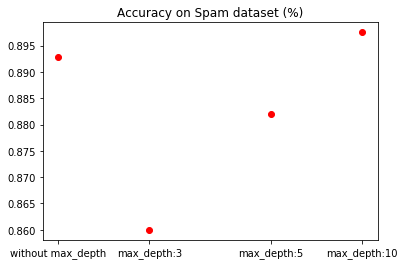

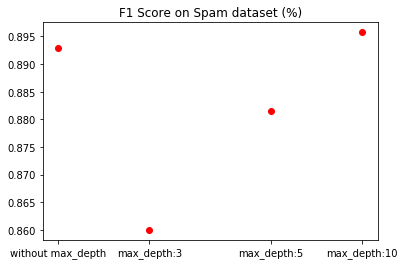

'\nBased on the accuracy and f1-score, the perfomance of model without max_depth \nis comparable to max_depth=10. Hence, we choose model without max_depth.\n'

In [170]:
# evaluating different hyperparameters for Decision tree models(i.e. Accuracy & F1_Score)
print("max_depth = 10")
# precision_recall_fscore allows us to get both the precision and f1 score in the same call
precision10,_,fbeta_score10,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_max_depth10,average="weighted")
print ("precision is {} and F1-score is {}".format(precision10,fbeta_score10))

print("\nmax_depth = 5")
precision5,_,fbeta_score5,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_max_depth5,average="weighted")
print ("precision is {} and F1-score is {}".format(precision5,fbeta_score5))

print("\nmax_depth = 3")
precision3,_,fbeta_score3,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_max_depth3,average="weighted")
print ("precision is {} and F1-score is {}".format(precision3,fbeta_score3))

print("\nmax_depth = None")
precision_None,_,fbeta_score_None,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_max_depth_None,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_None,fbeta_score_None))

plt.figure("Accuracy")
plt.title("Accuracy on Spam dataset (%)")
x_precision = np.array([0,3,7,10])
y_precision = np.array([precision_None,precision3,precision5,precision10])
my_xticks = ['without max_depth','max_depth:3','max_depth:5','max_depth:10']
plt.xticks(x_precision, my_xticks)
plt.plot(x_precision, y_precision,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Spam dataset (%)")
x_F1Score = np.array([0,3,7,10])
y_F1Score = np.array([fbeta_score_None,fbeta_score3,fbeta_score5,fbeta_score10])
my_xticks = ['without max_depth','max_depth:3','max_depth:5','max_depth:10']
plt.xticks(x_F1Score, my_xticks)
plt.plot(x_F1Score, y_F1Score,'ro')
plt.show()

'''
Based on the accuracy and f1-score, the perfomance of model without max_depth 
is comparable to max_depth=10. Hence, we choose model without max_depth.
'''

Correct classification rate for Test dataset with max depth None = 89.31159420289855%
Confusion matrix, without normalization
[[302  29]
 [ 30 191]]
Normalized confusion matrix
[[0.91 0.09]
 [0.14 0.86]]


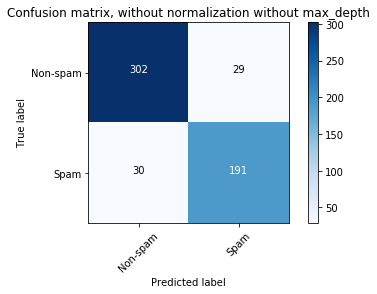

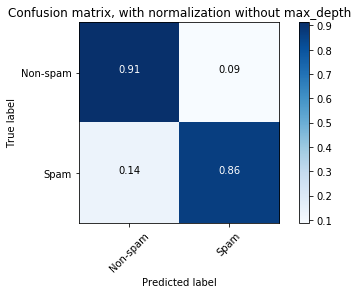

In [171]:
# Evaluating Test Dataset for galaxy with the chosen hyperparameter (i.e. Without max_depth)
Y_Test_pred_max_depth_None = model_depth_None.predict(X_test_spam)

acc_spam_test_max_depth_None = accuracy_score(Y_test_spam, Y_Test_pred_max_depth_None )
print("Correct classification rate for Test dataset with max depth None = "+str(acc_spam_test_max_depth_None*100)+"%")
cm_spam_test_max_depth_None = confusion_matrix(Y_test_spam, Y_Test_pred_max_depth_None )

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix for max depth =7
plt.figure()
plot_confusion_matrix(cm_spam_test_max_depth_None, classes= ['Non-spam', 'Spam'],
                      title='Confusion matrix, without normalization without max_depth')
plt.figure()
plot_confusion_matrix(cm_spam_test_max_depth_None, classes= ['Non-spam', 'Spam'], normalize=True,
                      title='Confusion matrix, with normalization without max_depth')
plt.show()

In [172]:
#################################################################################################
#
#                             2.1.2: Holdout - Naive Bayes
#
#################################################################################################

In [173]:
# Scale data for train, validation (hold out), and test
# first method of discretization using MDLP
from mdlp.discretization import MDLP
mdlp = MDLP()
Xtrain_spam_MDLP = mdlp.fit_transform(X_train_spam, Y_train_spam)
Xtest_spam_MDLP = mdlp.transform(X_test_spam, Y_test_spam)
Xvalid_spam_MDLP = mdlp.transform(X_valid_spam, Y_valid_spam)

In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain_spam_unsupervised = scaler.fit_transform(X_train_spam)
Xtest_spam_unsupervised = scaler.transform(X_test_spam)
Xvalid_spam_unsupervised= scaler.transform(X_valid_spam)

In [175]:
# Bayes naïf gaussien with three different parameters i.e. 
# 1. priors = probaility of each class

from sklearn.naive_bayes import GaussianNB
GaussianClassifier_priors = GaussianNB(priors=[spam_nonspam_ratio, spam_spam_ratio])
print("Bayes naïf gaussien & priors = probaility of each class")
GaussianClassifier_priors=GaussianClassifier_priors.fit(X_train_spam, Y_train_spam)
Y_validation_pred_Gaussian_priors = GaussianClassifier_priors.predict(X_valid_spam)

Bayes naïf gaussien & priors = probaility of each class


In [176]:
# Bayes naïf multinomial with three different parameters i.e. 
# 1. priors = probaility of each class
# 2. MDLP discretization
# 3. unsupervised discretization

from sklearn.naive_bayes import MultinomialNB
print("Bayes naïf multinomial & priors = probaility of each class")
MultinomialNBClassifier_priors = MultinomialNB(class_prior=[spam_nonspam_ratio, spam_spam_ratio], fit_prior=True)
MultinomialNBClassifier_priors=MultinomialNBClassifier_priors.fit(Xtrain_spam_MDLP,Y_train_spam)
Y_validation_pred_Multinomial_priors = MultinomialNBClassifier_priors.predict(Xvalid_spam_MDLP)

Bayes naïf multinomial & priors = probaility of each class


Bayes naïf multinomial & MDLP discretization
Bayes naïf multinomial & unsupervised discretization
Correct classification rate for validation dataset with Gaussian = 82.97101449275362%
Correct classification rate for validation dataset with multinomial priors = 85.5072463768116%
Correct classification rate for validation dataset with multinomial MDLP = 90.21739130434783%
Correct classification rate for validation dataset with multinomial unsupervised = 91.66666666666666%
Gaussian 
precision is 0.8642545087131617 and F1-score is 0.8311597640504007

 Bayes naïf multinomial & priors
precision is 0.8794935160790617 and F1-score is 0.8564987347596041

 Bayes naïf multinomial & MDLP
precision is 0.909101280850885 and F1-score is 0.9029609712414763

 Bayes naïf multinomial & unsupervised
precision is 0.9181020779060554 and F1-score is 0.915824282929546


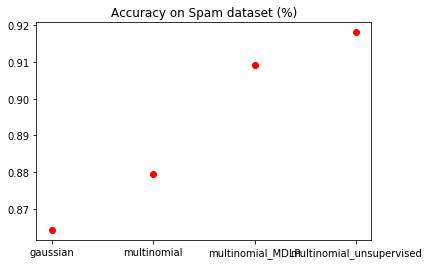

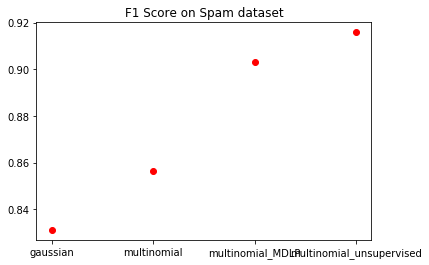

In [177]:
MultinomialNBClassifier_discret=MultinomialNB()
print("Bayes naïf multinomial & MDLP discretization")
MultinomialNBClassifier_discret_MDLP=MultinomialNBClassifier_discret.fit(Xtrain_spam_MDLP, Y_train_spam)
Y_validation_pred_Multinomial_discret_MDLP = MultinomialNBClassifier_discret_MDLP.predict(Xvalid_spam_MDLP)

print("Bayes naïf multinomial & unsupervised discretization")
MultinomialNBClassifier_discret_unsupervised=MultinomialNBClassifier_discret.fit(Xtrain_spam_unsupervised, Y_train_spam)
Y_validation_pred_Multinomial_discret_unsupervised = MultinomialNBClassifier_discret_unsupervised.predict(Xvalid_spam_unsupervised)

acc_spam_validation_Gaussian = accuracy_score(Y_valid_spam, Y_validation_pred_Gaussian_priors )
print("Correct classification rate for validation dataset with Gaussian = "+str(acc_spam_validation_Gaussian*100)+"%")
acc_spam_validation_multinomial_priors = accuracy_score(Y_valid_spam, Y_validation_pred_Multinomial_priors )
print("Correct classification rate for validation dataset with multinomial priors = "+str(acc_spam_validation_multinomial_priors*100)+"%")
acc_spam_validation_multinomial_MDLP = accuracy_score(Y_valid_spam, Y_validation_pred_Multinomial_discret_MDLP )
print("Correct classification rate for validation dataset with multinomial MDLP = "+str(acc_spam_validation_multinomial_MDLP*100)+"%")
acc_spam_validation_multinomial_unsupervised = accuracy_score(Y_valid_spam, Y_validation_pred_Multinomial_discret_unsupervised )
print("Correct classification rate for validation dataset with multinomial unsupervised = "+str(acc_spam_validation_multinomial_unsupervised*100)+"%")

print("Gaussian ")
precision_gaussian,_,fbeta_score_gaussian,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_Gaussian_priors,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_gaussian,fbeta_score_gaussian))
print("\n Bayes naïf multinomial & priors")
precision_multinomial_priors,_,fbeta_score_multinomial_priors,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_Multinomial_priors,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_multinomial_priors,fbeta_score_multinomial_priors))
print("\n Bayes naïf multinomial & MDLP")
precision_multinomial_MDLP,_,fbeta_score_multinomial_MDLP,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_Multinomial_discret_MDLP,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_multinomial_MDLP,fbeta_score_multinomial_MDLP))
print("\n Bayes naïf multinomial & unsupervised")
precision_multinomial_unsupervised,_,fbeta_score_multinomial_unsupervised,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_Multinomial_discret_unsupervised,average="weighted")
print ("precision is {} and F1-score is {}".format(precision_multinomial_unsupervised,fbeta_score_multinomial_unsupervised))

plt.figure("Accuracy")
plt.title("Accuracy on Spam dataset (%)")
x_precision = np.array([0,2,4,6])
y_precision = np.array([precision_gaussian,precision_multinomial_priors,precision_multinomial_MDLP,precision_multinomial_unsupervised])
my_xticks = ['gaussian','multinomial','multinomial_MDLP','multinomial_unsupervised']
plt.xticks(x_precision, my_xticks)
plt.plot(x_precision, y_precision,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Spam dataset")
x_F1Score = np.array([0,2,4,6])
y_F1Score = np.array([fbeta_score_gaussian,fbeta_score_multinomial_priors,fbeta_score_multinomial_MDLP,fbeta_score_multinomial_unsupervised])
my_xticks = ['gaussian','multinomial','multinomial_MDLP','multinomial_unsupervised']
plt.xticks(x_F1Score, my_xticks)
plt.plot(x_F1Score, y_F1Score,'ro')
plt.show()


Correct classification rate for Test dataset with gaussian = 82.06521739130434%
Confusion matrix, without normalization
[[242  89]
 [ 10 211]]
Normalized confusion matrix
[[0.73 0.27]
 [0.05 0.95]]


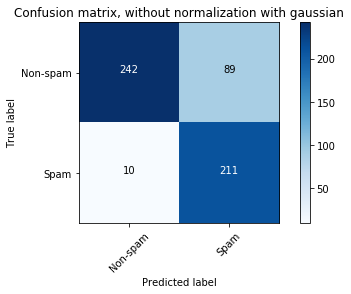

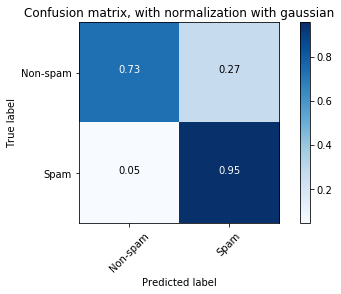

In [178]:
# Evaluating Test Dataset for spam with the chosen hyperparameter
Y_Test_pred_gaussian = GaussianClassifier_priors.predict(X_test_spam)
acc_spam_test_gaussian = accuracy_score(Y_test_spam, Y_Test_pred_gaussian )
print("Correct classification rate for Test dataset with gaussian = "+str(acc_spam_test_gaussian*100)+"%")
cm_spam_test_gaussian= confusion_matrix(Y_test_spam, Y_Test_pred_gaussian )

np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm_spam_test_gaussian, classes= ['Non-spam', 'Spam'],
                      title='Confusion matrix, without normalization with gaussian')
plt.figure()
plot_confusion_matrix(cm_spam_test_gaussian, classes= ['Non-spam', 'Spam'], normalize=True,
                      title='Confusion matrix, with normalization with gaussian')
plt.show()

In [179]:
#################################################################################################
#
#                             2.1.3: Holdout - KNN
#
#################################################################################################

In [180]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xtrain_spam_s = standard_scaler.fit_transform(X_train_spam)
Xtest_spam_s = standard_scaler.transform(X_test_spam)
Xvalid_spam_s = standard_scaler.transform(X_valid_spam)

In [181]:
#Classify using k-NN for k=3,5,10 and weight=uniform
from sklearn.neighbors import KNeighborsClassifier
print("k=3 and weight= uniform")
knn_3u = KNeighborsClassifier(n_neighbors=3, weights="uniform")
knn_3u.fit(Xtrain_spam_s, Y_train_spam)

Y_validation_pred_3u = knn_3u.predict(X_valid_spam)

print("k=5 and weight= uniform")
knn_5u = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn_5u.fit(Xtrain_spam_s, Y_train_spam)

Y_validation_pred_5u = knn_5u.predict(X_valid_spam)

print("k=10 and weight= uniform")
knn_10u = KNeighborsClassifier(n_neighbors=10, weights="uniform")
knn_10u.fit(Xtrain_spam_s, Y_train_spam)

Y_validation_pred_10u = knn_10u.predict(X_valid_spam)

acc_spam_validation_3u = accuracy_score(Y_valid_spam, Y_validation_pred_3u )
print("Correct classification rate for validation dataset with k=3 and weight: uniform = "+str(round(acc_spam_validation_3u*100, 4))+"%")
acc_spam_validation_5u = accuracy_score(Y_valid_spam, Y_validation_pred_5u )
print("Correct classification rate for validation dataset with k=5 and weight: uniform = "+str(round(acc_spam_validation_5u*100, 4))+"%")
acc_spam_validation_10u = accuracy_score(Y_valid_spam, Y_validation_pred_10u )
print("Correct classification rate for validation dataset with k=10 and weight: uniform = "+str(round(acc_spam_validation_10u*100, 4))+"%")

k=3 and weight= uniform
k=5 and weight= uniform
k=10 and weight= uniform
Correct classification rate for validation dataset with k=3 and weight: uniform = 47.8261%
Correct classification rate for validation dataset with k=5 and weight: uniform = 48.913%
Correct classification rate for validation dataset with k=10 and weight: uniform = 51.4493%


In [182]:
#Classify using k-NN for k=3,5,10 and weight=distance
print("k=3 and weight=distance")
knn_3d = KNeighborsClassifier(n_neighbors=3, weights="distance")
knn_3d.fit(Xtrain_spam_s, Y_train_spam)

Y_validation_pred_3d = knn_3u.predict(X_valid_spam)

print("k=5 and weight=distance")
knn_5d = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn_5d.fit(Xtrain_spam_s, Y_train_spam)

Y_validation_pred_5d = knn_5d.predict(X_valid_spam)

print("k=10 and weight=distance")
knn_10d = KNeighborsClassifier(n_neighbors=10, weights="distance")
knn_10d.fit(Xtrain_spam_s, Y_train_spam)

Y_validation_pred_10d = knn_10d.predict(X_valid_spam)

acc_spam_validation_3d = accuracy_score(Y_valid_spam, Y_validation_pred_3d )
print("Correct classification rate for validation dataset with k=3 and weight: distance = "+str(round(acc_spam_validation_3d*100, 4))+"%")

acc_spam_validation_5d = accuracy_score(Y_valid_spam, Y_validation_pred_5d )
print("Correct classification rate for validation dataset with k=5 and weight: distance = "+str(round(acc_spam_validation_5d*100, 4))+"%")

acc_spam_validation_10d = accuracy_score(Y_valid_spam, Y_validation_pred_10d )
print("Correct classification rate for validation dataset with k=10 and weight: distance = "+str(round(acc_spam_validation_10d*100, 4))+"%")

k=3 and weight=distance
k=5 and weight=distance
k=10 and weight=distance
Correct classification rate for validation dataset with k=3 and weight: distance = 47.8261%
Correct classification rate for validation dataset with k=5 and weight: distance = 48.913%
Correct classification rate for validation dataset with k=10 and weight: distance = 49.4565%


k=10 and weight=uniform
precision is 0.7712743138776529 and F1-score is 0.44263502130119675

k=5 and weight=uniform
precision is 0.7636878842485532 and F1-score is 0.4009613317081506

k=3 and weight=uniform
precision is 0.7600396383005079 and F1-score is 0.3823179595612528

k=10 and weight=distance
precision is 0.765400167497688 and F1-score is 0.41010119770777687

k=5 and weight=distance
precision is 0.7636878842485532 and F1-score is 0.4009613317081506

k=3 and weight=distance
precision is 0.7600396383005079 and F1-score is 0.3823179595612528


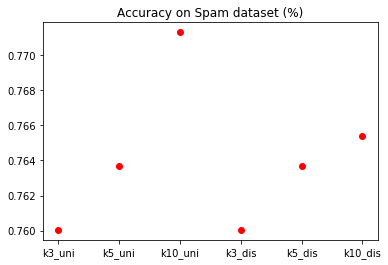

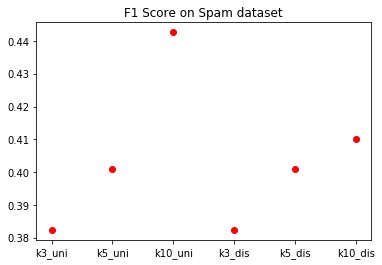

In [183]:
# evaluating different hyperparameters for Decision tree models(i.e. Accuracy & F1_Score)
print("k=10 and weight=uniform")
precision10u,_,fbeta_score10u,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_10u,average="weighted")
print ("precision is {} and F1-score is {}".format(precision10u,fbeta_score10u))
print("\nk=5 and weight=uniform")
precision5u,_,fbeta_score5u,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_5u,average="weighted")
print ("precision is {} and F1-score is {}".format(precision5u,fbeta_score5u))

print("\nk=3 and weight=uniform")
precision3u,_,fbeta_score3u,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_3u,average="weighted")
print ("precision is {} and F1-score is {}".format(precision3u,fbeta_score3u))

print("\nk=10 and weight=distance")
precision10d,_,fbeta_score10d,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_10d,average="weighted")
print ("precision is {} and F1-score is {}".format(precision10d,fbeta_score10d))

print("\nk=5 and weight=distance")
precision5d,_,fbeta_score5d,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_5d,average="weighted")
print ("precision is {} and F1-score is {}".format(precision5d,fbeta_score5d))

print("\nk=3 and weight=distance")
precision3d,_,fbeta_score3d,_=precision_recall_fscore_support(Y_valid_spam,Y_validation_pred_3d,average="weighted")
print ("precision is {} and F1-score is {}".format(precision3d,fbeta_score3d))

plt.figure("Accuracy")
plt.title("Accuracy on Spam dataset (%)")
x_precision = np.array([0,2,4,6,8,10])
y_precision = np.array([precision3u,precision5u,precision10u,precision3d,precision5d,precision10d])
my_xticks = ['k3_uni','k5_uni','k10_uni','k3_dis','k5_dis','k10_dis']
plt.xticks(x_precision, my_xticks)
plt.plot(x_precision, y_precision,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Spam dataset")
x_F1Score = np.array([0,2,4,6,8,10])
y_F1Score = np.array([fbeta_score3u,fbeta_score5u,fbeta_score10u,fbeta_score3d,fbeta_score5d,fbeta_score10d])
my_xticks = ['k3_uni','k5_uni','k10_uni','k3_dis','k5_dis','k10_dis']
plt.xticks(x_F1Score, my_xticks)
plt.plot(x_F1Score, y_F1Score,'ro')
plt.show()


Correct classification rate for Test dataset with k:10 & weight=uniform = 49.275362318840585%
Confusion matrix, without normalization
[[ 51 280]
 [  0 221]]
Normalized confusion matrix
[[0.15 0.85]
 [0.   1.  ]]


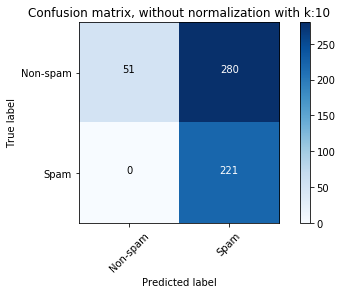

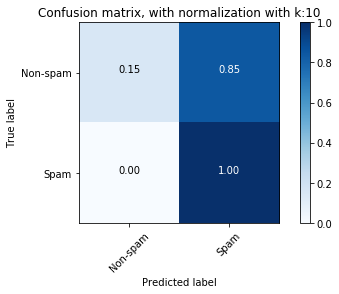

In [184]:
# Evaluating Test Dataset for spam with the chosen hyperparameter (i.e. k=10 and weight=uniform)
Y_Test_pred_k10u = knn_10u.predict(X_test_spam)

acc_spam_test_k10u = accuracy_score(Y_test_spam, Y_Test_pred_k10u )
print("Correct classification rate for Test dataset with k:10 & weight=uniform = "+str(acc_spam_test_k10u*100)+"%")
cm_spam_test_k10u= confusion_matrix(Y_test_spam, Y_Test_pred_k10u )

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix for k = 10
plt.figure()
plot_confusion_matrix(cm_spam_test_k10u, classes= ['Non-spam', 'Spam'],
                      title='Confusion matrix, without normalization with k:10')
plt.figure()
plot_confusion_matrix(cm_spam_test_k10u, classes= ['Non-spam', 'Spam'], normalize=True,
                      title='Confusion matrix, with normalization with k:10')
plt.show()

In [185]:
#################################################################################################
#
#                             2.2: KFold method
#
#################################################################################################

In [186]:
# - Split the data into train and valid, holding 20% of the data into valid
# - We are suffling the data to avoid ordered data by labels
# - Stratification means that the train_test_split method returns
#   training and test subsets that have the same proportions of class labels as the input dataset.
# - Random_state is desirable for reproducibility.
from sklearn.model_selection import train_test_split

X_train_spam, X_test_spam, Y_train_spam, Y_test_spam = train_test_split(
    X_data_spam, Y_data_spam, test_size=0.2, random_state=0, shuffle=True, stratify=Y_data_spam
)

In [187]:
#################################################################################################
#
#                             2.2.1: KFold - Decision Tree
#
#################################################################################################

Decision Tree with 10 folds (max_depth=3)

Correct classification rate for fold #1: 90.8252% (max_depth=3, f1_score=0.9059)
Correct classification rate for fold #2: 87.9834% (max_depth=3, f1_score=0.8768)
Correct classification rate for fold #3: 92.8338% (max_depth=3, f1_score=0.9281)
Correct classification rate for fold #4: 88.2487% (max_depth=3, f1_score=0.876)
Correct classification rate for fold #5: 84.0571% (max_depth=3, f1_score=0.8323)
Correct classification rate for fold #6: 86.8462% (max_depth=3, f1_score=0.8683)
Correct classification rate for fold #7: 84.3165% (max_depth=3, f1_score=0.8378)
Correct classification rate for fold #8: 83.3604% (max_depth=3, f1_score=0.8285)
Correct classification rate for fold #9: 88.6013% (max_depth=3, f1_score=0.886)
Correct classification rate for fold #10: 89.0628% (max_depth=3, f1_score=0.8907)

Correct classification rate: 87.6135%
F1 Score: 0.873


Decision Tree with 10 folds (max_depth=5)

Correct classification rate for fold #1: 91.1117

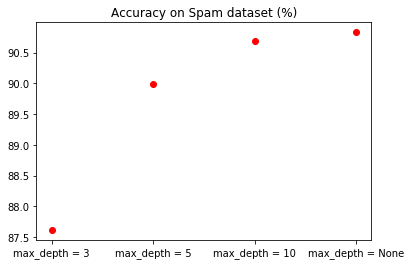

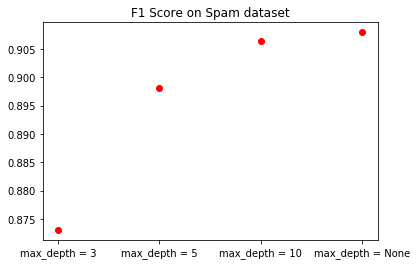

In [188]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn import tree

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

max_depths = np.array([3, 5, 10, None])
precisions = []
f1_scores = []

for i in range(0, 4):
    print("Decision Tree with 10 folds (max_depth=" + str(max_depths[i]) + ")\n")
    sum_precision = 0;
    sum_f1_score = 0;
    fold_counter = 0
    for train_index, test_index in skf.split(X_train_spam, Y_train_spam):
        X_train, X_valid = X_train_spam[train_index], X_train_spam[test_index];
        Y_train, Y_valid = Y_train_spam[train_index], Y_train_spam[test_index];

        model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=max_depths[i])
        model = model.fit(X_train, Y_train)

        Y_valid_pred = model.predict(X_valid)
        
        precision,_,f1_score,_ = precision_recall_fscore_support(Y_valid, Y_valid_pred, average="weighted")
        
        fold_counter += 1
        sum_precision += precision;
        sum_f1_score += f1_score;
        
        print("Correct classification rate for fold #" + str(fold_counter) + ": " + str(round(precision * 100, 4)) + "% (max_depth=" + str(max_depths[i]) + ", f1_score=" + str(round(f1_score, 4)) + ")")
    precisions.append((sum_precision / 10) * 100)
    f1_scores.append((sum_f1_score / 10))
    print("\nCorrect classification rate: " + str(round((sum_precision / 10) * 100, 4)) + "%")
    print("F1 Score: " + str(round((sum_f1_score / 10), 4)) + "\n\n")

plt.figure("Accuracy")
plt.title("Accuracy on Spam dataset (%)")
x_values = np.array([0,2,4,6])
y_values = np.array(precisions)
my_xticks = ['max_depth = 3','max_depth = 5','max_depth = 10','max_depth = None']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Spam dataset")
x_values = np.array([0,2,4,6])
y_values = np.array(f1_scores)
my_xticks = ['max_depth = 3','max_depth = 5','max_depth = 10','max_depth = None']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')
plt.show()

In [189]:
#We keep the best one, max_depth=None
max_depth_none = [precisions[3], f1_scores[3]]
print(max_depth_none)

[90.82927756739822, 0.9079421826801708]


In [190]:
#################################################################################################
#
#                             2.2.2: KFold - Naive Bayes
#
#################################################################################################

In [191]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn import tree
from mdlp.discretization import MDLP
from sklearn.naive_bayes import GaussianNB

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

sum_precision = 0
sum_f1_score = 0
fold_counter = 0

precisions_bayes = []
f1_scores_bayes = []

print("Naive Bayes Gaussian (priors) with 10 folds\n")

# Loop through the 10 folds
for train_index, test_index in skf.split(X_train_spam, Y_train_spam):
    X_train, X_valid = X_train_spam[train_index], X_train_spam[test_index];
    Y_train, Y_valid = Y_train_spam[train_index], Y_train_spam[test_index];

    model = GaussianNB(priors=[spam_nonspam_ratio, spam_spam_ratio])
    model = model.fit(X_train, Y_train)
    
    Y_valid_pred = model.predict(X_valid)
        
    precision,_,f1_score,_ = precision_recall_fscore_support(Y_valid, Y_valid_pred, average="weighted")
    
    fold_counter += 1
    sum_precision += precision;
    sum_f1_score += f1_score;
    
    print("Correct classification rate for fold #" + str(fold_counter) + ": " + str(round(precision * 100, 4)) + "%")

# Keep track of scores for graphs later
precisions_bayes.append((sum_precision / 10) * 100)
f1_scores_bayes.append((sum_f1_score / 10))

print("\nCorrect classification rate: " + str(round((sum_precision / 10) * 100, 4)) + "%")
print("F1 Score: " + str(round((sum_precision / 10), 4)))

Naive Bayes Gaussian (priors) with 10 folds

Correct classification rate for fold #1: 85.437%
Correct classification rate for fold #2: 84.0132%
Correct classification rate for fold #3: 87.8005%
Correct classification rate for fold #4: 85.4451%
Correct classification rate for fold #5: 83.2118%
Correct classification rate for fold #6: 85.5444%
Correct classification rate for fold #7: 85.4634%
Correct classification rate for fold #8: 82.4397%
Correct classification rate for fold #9: 88.7702%
Correct classification rate for fold #10: 85.3053%

Correct classification rate: 85.3431%
F1 Score: 0.8534


In [192]:
from sklearn.naive_bayes import MultinomialNB
from mdlp.discretization import MDLP

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
mdlp = MDLP()

sum_precision = 0
sum_f1_score = 0
fold_counter = 0

print("Naive Bayes Multinomial (priors + MDLP) with 10 folds\n")

# Loop through the 10 folds
for train_index, test_index in skf.split(X_train_spam, Y_train_spam):
    X_train, X_valid = X_train_spam[train_index], X_train_spam[test_index];
    Y_train, Y_valid = Y_train_spam[train_index], Y_train_spam[test_index];
    
    X_train_mdlp = mdlp.fit_transform(X_train, Y_train)
    X_valid_mdlp = mdlp.transform(X_valid, Y_valid)

    model = MultinomialNB(class_prior=[spam_nonspam_ratio, spam_spam_ratio], fit_prior=True)
    model = model.fit(X_train_mdlp, Y_train)
    
    Y_valid_pred = model.predict(X_valid_mdlp)
        
    precision,_,f1_score,_ = precision_recall_fscore_support(Y_valid, Y_valid_pred, average="weighted")
    
    sum_precision += precision;
    sum_f1_score += f1_score;
    fold_counter += 1
    
    print("Correct classification rate for fold #" + str(fold_counter) + ": " + str(round(precision * 100, 4)) + "%")
    
# Keep track of scores for graphs later
precisions_bayes.append((sum_precision / 10) * 100)
f1_scores_bayes.append((sum_f1_score / 10))

print("\nCorrect classification rate: " + str(round((sum_precision / 10) * 100, 4)) + "%")
print("F1 Score: " + str(round((sum_f1_score / 10), 4)))

Naive Bayes Multinomial (priors + MDLP) with 10 folds

Correct classification rate for fold #1: 90.2524%
Correct classification rate for fold #2: 83.0508%
Correct classification rate for fold #3: 90.5477%
Correct classification rate for fold #4: 88.8471%
Correct classification rate for fold #5: 84.8143%
Correct classification rate for fold #6: 86.9317%
Correct classification rate for fold #7: 87.205%
Correct classification rate for fold #8: 85.092%
Correct classification rate for fold #9: 90.4786%
Correct classification rate for fold #10: 87.3123%

Correct classification rate: 87.4532%
F1 Score: 0.8505


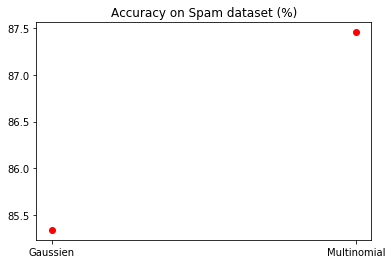

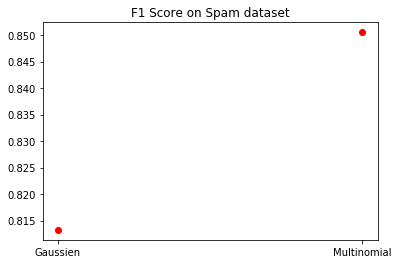

In [193]:
plt.figure("Accuracy")
plt.title("Accuracy on Spam dataset (%)")
x_values = np.array([0,2])
y_values = np.array(precisions_bayes)
my_xticks = ['Gaussien','Multinomial']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

plt.figure("F1 Score")
x_values = np.array([0,2])
y_values = np.array(f1_scores_bayes)
my_xticks = ['Gaussien','Multinomial']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')
plt.title("F1 Score on Spam dataset")
plt.show()

In [194]:
#################################################################################################
#
#                             2.2.3: KFold - KNN
#
#################################################################################################

In [195]:
from sklearn import neighbors

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
mdlp = MDLP()

# we create an instance of Neighbours Classifier and train with the training dataset.
metric = 'euclidean'
algorithm = 'brute'

hyperparameter_k = [3, 5, 10]
hyperparameter_weight = ['distance', 'uniform']

precisions_knn = []
f1_scores_knn = []

# Loop through hyperparameter 'weight'
for i in range (0, 2):
    for j in range(0, 3):
        print("KNN with 10 folds (k=" + str(hyperparameter_k[j]) + ", weight=" + str(hyperparameter_weight[i]) + ")\n")

        sum_precision = 0
        sum_f1_score = 0
        fold_counter = 0

        for train_index, test_index in skf.split(X_train_spam, Y_train_spam):
            X_train, X_valid = X_train_spam[train_index], X_train_spam[test_index]
            Y_train, Y_valid = Y_train_spam[train_index], Y_train_spam[test_index]

            model = neighbors.KNeighborsClassifier(hyperparameter_k[j], weights=hyperparameter_weight[i], algorithm=algorithm, metric=metric)
            model = model.fit(X_train, Y_train)

            Y_valid_pred = model.predict(X_valid)

            precision,_,f1_score,_ = precision_recall_fscore_support(Y_valid, Y_valid_pred, average="weighted")

            sum_precision += precision;
            sum_f1_score += f1_score;
            fold_counter += 1
            print("Correct classification rate for fold #" + str(fold_counter) + ": " + str(round(precision * 100, 4)) + "%")
        
        precisions_knn.append((sum_precision / 10) * 100)
        f1_scores_knn.append((sum_f1_score / 10))
        print("\nCorrect classification rate: " + str(round((sum_precision / 10) * 100, 4)) + "%")
        print("F1 Score: " + str(round((sum_f1_score / 10), 4)) + "\n\n")


KNN with 10 folds (k=3, weight=distance)

Correct classification rate for fold #1: 78.4737%
Correct classification rate for fold #2: 81.9254%
Correct classification rate for fold #3: 82.5538%
Correct classification rate for fold #4: 79.5347%
Correct classification rate for fold #5: 80.366%
Correct classification rate for fold #6: 81.7598%
Correct classification rate for fold #7: 73.8655%
Correct classification rate for fold #8: 85.3922%
Correct classification rate for fold #9: 79.8571%
Correct classification rate for fold #10: 78.1305%

Correct classification rate: 80.1859%
F1 Score: 0.8005


KNN with 10 folds (k=5, weight=distance)

Correct classification rate for fold #1: 76.1643%
Correct classification rate for fold #2: 82.4677%
Correct classification rate for fold #3: 82.5538%
Correct classification rate for fold #4: 80.4871%
Correct classification rate for fold #5: 78.9396%
Correct classification rate for fold #6: 79.9341%
Correct classification rate for fold #7: 75.1597%
Correct 

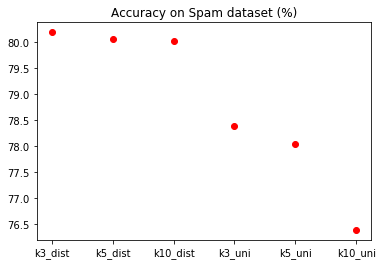

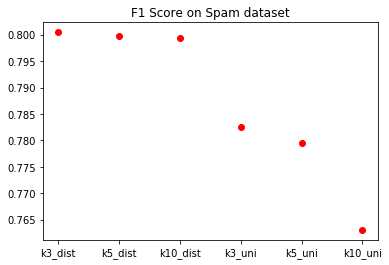

In [196]:
plt.figure("Accuracy")
plt.title("Accuracy on Spam dataset (%)")
x_values = np.array([0,2,4,6,8,10])
y_values = np.array(precisions_knn)
my_xticks = ['k3_dist','k5_dist','k10_dist','k3_uni','k5_uni','k10_uni']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Spam dataset")
x_values = np.array([0,2,4,6,8,10])
y_values = np.array(f1_scores_knn)
my_xticks = ['k3_dist','k5_dist','k10_dist','k3_uni','k5_uni','k10_uni']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')


In [197]:
# The mode with the best result is the Decision tree with max_depth=None
# Let's validate the test set

model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_depth=None)
model = model.fit(X_train_spam, Y_train_spam)

Y_test_pred = model.predict(X_test_spam)

precision,_,f1_score,_ = precision_recall_fscore_support(Y_test_spam, Y_test_pred, average="weighted")

print("\nCorrect classification rate: " + str(round(precision * 100, 4)) + "%")
print("F1 Score: " + str(round(f1_score, 4)) + "\n\n")


Correct classification rate: 89.6485%
F1 Score: 0.8965




[85.34306998489626, 87.45318189407298]


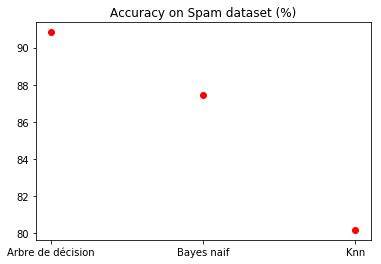

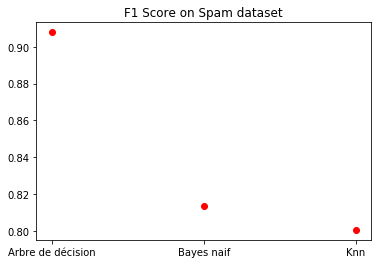

In [198]:
precisions_best = [max_depth_none[0], precisions_bayes[1], precisions_knn[0]]
f1_scores_best = [max_depth_none[1], f1_scores_bayes[0], f1_scores_knn[0]]

print(precisions_bayes)
plt.figure("Accuracy")
plt.title("Accuracy on Spam dataset (%)")
x_values = np.array([0,2,4])
y_values = np.array(precisions_best)
my_xticks = ['Arbre de décision','Bayes naif','Knn']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

plt.figure("F1 Score")
plt.title("F1 Score on Spam dataset")
x_values = np.array([0,2,4])
y_values = np.array(f1_scores_best)
my_xticks = ['Arbre de décision','Bayes naif','Knn']
plt.xticks(x_values, my_xticks)
plt.plot(x_values, y_values,'ro')

**Quelle a été votre approche de manipulation de données? Comment avez-vous créé vos ensembles de données? Quels en ont été les résultats? Détaillez les ensembles produits.**

Pour commencer, nous lisons les fichiers .csv qui contient les vecteurs de primitives déjà extraites pour les deux datasets. Ensuite, nous calculons la proportion des étiquettes et nous la stockons dans une variable pour usage futur (les priors dans le Bayes Naif).

Nous divisons ensuite les données en ensemble de test (20%), en ensemble de validation (20%) et en ensemble d’entraînement (60%).

On passe au modèle arbre de décision avec validation hold-out: on crée notre modèle initial avec DecisionTreeClassifier et on l’entraîne sur notre ensemble d’entraînement (60%). 

Pour le modèle kNN, on commence par ajuster les données (scale) pour que les primitives aient tous un poids équilibré. On crée ensuite notre modèle initial avec KNeighborsClassifier et on l’entraîne sur notre ensemble d’entraînement ajusté (20%). 

Pour le modèle Bayes Naif, on commence par créer un ensembles de donnée discrétisé à l’aide des ensembles existant suivi d’une transformation à l’aide de MDLP(). On crée ensuite notre modèle initial avec GaussianNB et on l’entraîne sur notre ensemble d’entraînement (20%). Un autre modèle est créé à l’aide de MultinomialNB. Celui-ci est entraîné sur l’ensemble d'entraînement discrétisé (20%). Les deux sont ajustés (“fit”) au priors, ratio calculés au début du notebook.

Pour la méthode de cross-validation k-fold, nous devions diviser l’ensemble d’entraînement (60%) en 10 sous-ensembles, ce qui nous donne 99 données par sous-ensemble pour le dataset du spam et 487 données par sous-ensemble pour le dataset des galaxies. Ceci a été réalisé grâce à la méthode StratifiedKFold. Chaque sous-ensemble a ensuite été entraîné sur les 9 autres sous-ensemble avec les mêmes classificateurs décrits ci-haut pour produire un résultat. À la fin, nous avions 10 résultats, alors nous avons fait la moyenne de ceux-ci pour avoir la performance du modèle.

Pour tous les types de modèles, on répète les mêmes étapes pour les différents hyperparamètres. Ensuite, on le test sur notre ensemble de validation (20%) avec la méthode precision_recall_fscore_support pour avoir notre résultat.

**
Parmi les méthodes de validation (Leave-one-out cross-validation, Leave-p-out crossvalidation, k-fold cross-validation, holdout), présentez les approches de validation que vous avez utilisées. Quels ont été les résultats de votre comparaison des méthodes?
**
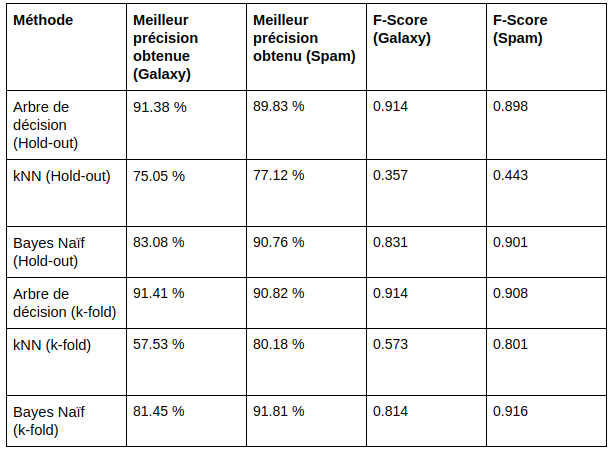

Résultats sur l’ensemble de test:

Sur l’ensemble de test (galaxy), avec la méthode Arbre de décision, on obtient une précision de 91.52%, avec un F-score de 0.915

Sur l’ensemble de test (spam), avec la méthode Bayes Naïf multinomial, on obtient une précision de 89.64 %, avec un F-score de 0.896

**Pour chacun des modèles d’apprentissage élaborés, expliquez l’impact des hyperparamètres sur les performances des modèles.
**

Pour l’hyperparamètre max_depth de l’arbre de décision, il y avait 4 valeurs possibles, soit 3, 5, 10 et None. Plus la valeur du max_depth est grande, plus l’arbre sera profond et utilisera davantage l’information fournie. Il faut donc que sa valeur soit assez grande pour que l’arbre représente bien l’information tout en n’étant pas surentraîné.

Ensuite, pour le KNN, il y a l’hyperparamètre K. Celui-ci sert à indiquer au KNN combien de voisins les plus près il doit regarder pour estimer. Plus le nombre de voisins est grand, plus le KNN offrira une représentation “lisse”. Par contre, indiquer un trop grand nombre de voisins peut causer un surentraînement et donc une mauvaise représentation.

Finalement, l’hyperparamètre Gaussien et Multinomial de Bayes naïf affecte si les données sont traitées comme des valeurs discrètes ou si elles sont traitées comme des valeurs continues. Le choix de cet hyperparamètre est donc situationnel par rapport à comment les données doivent être traitées.

**Quel est l’impact de la taille de l’ensemble d’apprentissages sur la performance de classification des différents modèles?**

La taille de l’ensemble d’apprentissages affecte grandement la performance de classification des modèles, puisque le modèle a plus de données pour estimer le système de probabilités. À chaque nouvel apprentissage, le modèle va s’ajuster pour que son système de probabilités respecte ce nouvel apprentissage et donc sa précision va augmenter. Il faut donc une quantité assez grande d’apprentissages pour que le modèle soit assez précis. Alors, plus l’ensemble d’apprentissages est grand, plus la précision du modèle sera grande.

**Faites une discussion mettant en parallèle la nature des données. Est-ce qu’un ensemble de données se démarque par rapport à un algorithme de classification?**

La performance de l'algorithme de classification kNN sur l'ensemble de données des galaxies varie grandement de la performance obtenue sur le dataset du spam. En effet, on parle ici d'une différence de ~23% (57.53% de précision sur les galaxies contre 80.18 sur les spam). Ceci peut s'expliquer par le fait que les primitives choisies pour le dataset du spam ont un pouvoir plus discriminant que ceux choisies pour les galaxies, ce qui résulte une séparation plus distincte des classes. 

**Quel type de classificateur recommanderiez-vous pour l’une et l’autre des ensembles de données et dans quelles conditions (par exemple, le nombre de données privilégié)?**

Le classificateur que l’équipe recommanderait serait l’arbre de décision avec un max_depth d’une valeur de None. C’est de loin le classificateur qui a eu la meilleure précision ainsi que le meilleur f1 score et donc est celui qui classifie le mieux les données. Les deux autres méthodes, soit Knn et Bayes naïf ont affichés une précision ainsi qu’un f1 score plus bas.

**Formulez quelques pistes d’amélioration des classificateurs.**

Il y a quelques améliorations possibles à faire sur les différents classificateurs pour augmenter la précision de ces derniers. Par exemple, augmenter la valeur k du K-fold appliqué sur chacune des méthodes aurait eu comme effet d’avoir davantage de données pour entraîner le modèle. Le modèle serait donc plus précis et afficherait un meilleur score. Aussi, utiliser un ensemble de données plus grand pour entraîner le modèle aurait pu être une façon d’améliorer les classificateurs. Dû à la contrainte de temps et à la charge de calcul, nous n’avons pas eu l’occasion de tester toutes les possibilités d’optimisation des hyperparamètres. En effectuant des tests sur les valeurs de ces hyperparamètres, l’équipe aurait pu déterminer les hyperparamètres les plus optimisés pour les classificateurs.
